In [1]:
#  Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To overwrite the look of matplotlib with seaborn
sns.set()

In [2]:
# Loading the original pre-processed data
loan_data_inputs_train = pd.read_csv(r'C:\Users\WIN8\Desktop\PGDS 2020\Models\Lending Club Credit Risk\Processed Datasets for PD\loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv(r'C:\Users\WIN8\Desktop\PGDS 2020\Models\Lending Club Credit Risk\Processed Datasets for PD\loan_data_targets_train.csv', index_col = 0, header = None)
loan_data_inputs_test = pd.read_csv(r'C:\Users\WIN8\Desktop\PGDS 2020\Models\Lending Club Credit Risk\Processed Datasets for PD\loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv(r'C:\Users\WIN8\Desktop\PGDS 2020\Models\Lending Club Credit Risk\Processed Datasets for PD\loan_data_targets_test.csv', index_col = 0, header = None)

In [3]:
# Loading the new data
loan_data_backup = pd.read_csv(r'C:\Users\WIN8\Desktop\PGDS 2020\Datasets\Credit Risk Analysis\Lending Club Data Kaggle\loan_data_2015.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Creating a copy of the new data
loan_data = loan_data_backup.copy()

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
id                             421094 non-null int64
member_id                      421094 non-null int64
loan_amnt                      421094 non-null int64
funded_amnt                    421094 non-null int64
funded_amnt_inv                421094 non-null float64
term                           421094 non-null object
int_rate                       421094 non-null float64
installment                    421094 non-null float64
grade                          421094 non-null object
sub_grade                      421094 non-null object
emp_title                      397220 non-null object
emp_length                     397277 non-null object
home_ownership                 421094 non-null object
annual_inc                     421094 non-null float64
verification_status            421094 non-null object
issue_d                        421094 non-null object
loan_status              

We will preprocess this new data in the same way in which we preprocessed the original data.

#### Preprocessing few continuous variables

In [6]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '5 years', '3 years', '4 years', nan,
       '2 years', '8 years', '9 years', '1 year', '6 years', '7 years'],
      dtype=object)

We need to remove 'years', '+', '>' and other text from this variable. We only need the numerical part of the data.

In [7]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].fillna(str(0))

In [8]:
loan_data['emp_length_int'].dtype

dtype('O')

In [9]:
#Converting to numerical
loan_data['emp_length_int'] = loan_data['emp_length_int'].astype(float)
loan_data['emp_length_int'].dtype

dtype('float64')

In [10]:
loan_data['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [11]:
loan_data['term_int'] = loan_data['term'].str.lstrip()
loan_data['term_int'] = loan_data['term_int'].str.replace(' months', '')
loan_data['term_int'].unique()

array(['60', '36'], dtype=object)

In [12]:
#Converting to numerical
loan_data['term_int'] = loan_data['term_int'].astype(float)
loan_data['term_int'].dtype

dtype('float64')

In [13]:
loan_data['earliest_cr_line']

0         Feb-90
1         Jul-01
2         Jul-11
3         Dec-98
4         Aug-00
           ...  
421089    Sep-04
421090    Mar-74
421091    Sep-03
421092    Oct-03
421093    Dec-01
Name: earliest_cr_line, Length: 421094, dtype: object

We see that earliest_cr_line and issue_d are in text format. We need to convert them to months from the current date.

In [14]:
loan_data['earliest_cr_line']

0         Feb-90
1         Jul-01
2         Jul-11
3         Dec-98
4         Aug-00
           ...  
421089    Sep-04
421090    Mar-74
421091    Sep-03
421092    Oct-03
421093    Dec-01
Name: earliest_cr_line, Length: 421094, dtype: object

In [15]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
loan_data['months_since_earliest_cr_line'] = round((pd.to_datetime('2018-12-01') - loan_data['earliest_cr_line_date'])/np.timedelta64(1, 'M'))

In [17]:
loan_data['months_since_earliest_cr_line']

0         346.0
1         209.0
2          89.0
3         240.0
4         220.0
          ...  
421089    171.0
421090    537.0
421091    183.0
421092    182.0
421093    204.0
Name: months_since_earliest_cr_line, Length: 421094, dtype: float64

In [18]:
loan_data['months_since_earliest_cr_line'].describe()

count    421094.000000
mean        239.354876
std          98.123989
min        -600.000000
25%         179.000000
50%         224.000000
75%         289.000000
max         599.000000
Name: months_since_earliest_cr_line, dtype: float64

In [19]:
loan_data.loc[:, ['earliest_cr_line', 'earliest_cr_line_date', 'months_since_earliest_cr_line']][loan_data['months_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,months_since_earliest_cr_line
254,Jan-57,2057-01-01,-457.0
618,Aug-64,2064-08-01,-548.0
648,Jul-68,2068-07-01,-595.0
1808,Jan-65,2065-01-01,-553.0
2583,Sep-64,2064-09-01,-549.0
...,...,...,...
418890,Jun-68,2068-06-01,-594.0
420450,Jan-66,2066-01-01,-565.0
420642,Sep-68,2068-09-01,-597.0
420794,Sep-65,2065-09-01,-561.0


In [20]:
loan_data['months_since_earliest_cr_line'][loan_data['months_since_earliest_cr_line'] < 0] = loan_data['months_since_earliest_cr_line'].max()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
min(loan_data['months_since_earliest_cr_line'])

73.0

In [22]:
loan_data['issue_d']

0         Dec-15
1         Dec-15
2         Dec-15
3         Dec-15
4         Dec-15
           ...  
421089    Jan-15
421090    Jan-15
421091    Jan-15
421092    Jan-15
421093    Jan-15
Name: issue_d, Length: 421094, dtype: object

In [23]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
type(loan_data['issue_d_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
loan_data['months_issue_d_date'] = round((pd.to_datetime('2017-12-01') - loan_data['issue_d_date'])/np.timedelta64(1, 'M'))
loan_data['months_issue_d_date']

0         24.0
1         24.0
2         24.0
3         24.0
4         24.0
          ... 
421089    35.0
421090    35.0
421091    35.0
421092    35.0
421093    35.0
Name: months_issue_d_date, Length: 421094, dtype: float64

In [25]:
loan_data['months_issue_d_date'].describe()

count    421094.000000
mean         29.044629
std           3.458162
min          24.000000
25%          26.000000
50%          29.000000
75%          32.000000
max          35.000000
Name: months_issue_d_date, dtype: float64

#### Preprocessing Discrete Features

In [26]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [27]:
# Creating dummies for the categorical variables

loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                    pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                    pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                    pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                    pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                    pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                    pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                    pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]


loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,...,0,0,0,0,0,0,0,0,0,1
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,...,0,0,0,0,0,0,0,0,0,1
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,...,0,0,0,0,0,0,0,0,0,1
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,...,0,0,0,0,0,0,0,0,0,1
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,...,0,0,0,0,0,0,0,0,0,1


### Missing Values Imputation

In [28]:
loan_data.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                        ..
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
Length: 202, dtype: int64

In [29]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [30]:
loan_data['annual_inc'].fillna(np.mean(loan_data['annual_inc']), inplace = True)
loan_data['annual_inc'].isnull().sum()

0

In [31]:
loan_data['delinq_2yrs'].fillna( 0 , inplace = True)
loan_data['inq_last_6mths'].fillna( 0 , inplace = True)
loan_data['open_acc'].fillna( 0 , inplace = True)
loan_data['pub_rec'].fillna( 0 , inplace = True)
loan_data['total_acc'].fillna( 0 , inplace = True)
loan_data['acc_now_delinq'].fillna( 0 , inplace = True)
loan_data['emp_length_int'].fillna( 0 , inplace = True)
loan_data['months_since_earliest_cr_line'].fillna( 0 , inplace = True)

## PD Model

### Dependent Variable

In [32]:
loan_data['loan_status'].unique()

array(['Issued', 'Current', 'Fully Paid', 'In Grace Period',
       'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off',
       'Default'], dtype=object)

In [33]:
loan_data['loan_status'].value_counts()

Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: loan_status, dtype: int64

In [34]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current               0.896600
Fully Paid            0.054582
Issued                0.020091
Late (31-120 days)    0.011140
In Grace Period       0.007378
Charged Off           0.006585
Late (16-30 days)     0.002705
Default               0.000919
Name: loan_status, dtype: float64

In [35]:
# Creating a binary variable for loan status
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off ', 'Late (31-120 days)',
                                                               'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (31-120 days)', 'Default']), 0, 1)

In [36]:
loan_data['good_bad'].head()

0    1
1    1
2    1
3    1
4    1
Name: good_bad, dtype: int32

In [37]:
df_inputs_prepr = loan_data.drop('good_bad', axis = 1)
df_targets_prepr = loan_data['good_bad']

## Manual Preprocessing Discrete Variables

We want to access its explanatory power in relation to default.

In [38]:
df_inputs_prepr['grade'].unique()

array(['C', 'A', 'B', 'F', 'D', 'E', 'G'], dtype=object)

In [39]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head()

,grade,good_bad
0,C,1
1,A,1
2,C,1
3,C,1
4,B,1


In [40]:

df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,73335
1,B,117606
2,C,120567
3,D,62654
4,E,34948
5,F,9817
6,G,2167


In [41]:
# Calculating the proportion of good borrowers
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.997586
1,B,0.994175
2,C,0.988521
3,D,0.979267
4,E,0.972616
5,F,0.955893
6,G,0.934010


In [42]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)

df1

,grade,good_bad,grade,good_bad
0,A,73335,A,0.997586
1,B,117606,B,0.994175
2,C,120567,C,0.988521
3,D,62654,D,0.979267
4,E,34948,E,0.972616
5,F,9817,F,0.955893
6,G,2167,G,0.934010


In [43]:
df1 = df1.iloc[:, [0,1,3]]
df1

,grade,good_bad,good_bad
0,A,73335,0.997586
1,B,117606,0.994175
2,C,120567,0.988521
3,D,62654,0.979267
4,E,34948,0.972616
5,F,9817,0.955893
6,G,2167,0.934010


In [44]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,A,73335,0.997586
1,B,117606,0.994175
2,C,120567,0.988521
3,D,62654,0.979267
4,E,34948,0.972616
5,F,9817,0.955893
6,G,2167,0.934010


In [45]:

df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
df1.head()

,grade,n_obs,prop_good,prop_n_obs
0,A,73335,0.997586,0.174154
1,B,117606,0.994175,0.279287
2,C,120567,0.988521,0.286318
3,D,62654,0.979267,0.148789
4,E,34948,0.972616,0.082993


In [46]:
# Storing number of good and bad borrowers as per grade
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,73335,0.997586,0.174154,73158.0,177.0
1,B,117606,0.994175,0.279287,116921.0,685.0
2,C,120567,0.988521,0.286318,119183.0,1384.0
3,D,62654,0.979267,0.148789,61355.0,1299.0
4,E,34948,0.972616,0.082993,33991.0,957.0
5,F,9817,0.955893,0.023313,9384.0,433.0
6,G,2167,0.934010,0.005146,2024.0,143.0


In [47]:
# Calculating the proportion of good and bad borrowers for each grade
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,73335,0.997586,0.174154,73158.0,177.0,0.175854,0.034856
1,B,117606,0.994175,0.279287,116921.0,685.0,0.281049,0.134896
2,C,120567,0.988521,0.286318,119183.0,1384.0,0.286487,0.272548
3,D,62654,0.979267,0.148789,61355.0,1299.0,0.147482,0.255809
4,E,34948,0.972616,0.082993,33991.0,957.0,0.081706,0.188460
5,F,9817,0.955893,0.023313,9384.0,433.0,0.022557,0.085270
6,G,2167,0.934010,0.005146,2024.0,143.0,0.004865,0.028161


In [48]:
# Calculating Weight of Evidence
df1['WOE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE
0,A,73335,0.997586,0.174154,73158.0,177.0,0.175854,0.034856,1.618421
1,B,117606,0.994175,0.279287,116921.0,685.0,0.281049,0.134896,0.734029
2,C,120567,0.988521,0.286318,119183.0,1384.0,0.286487,0.272548,0.049876
3,D,62654,0.979267,0.148789,61355.0,1299.0,0.147482,0.255809,-0.550724
4,E,34948,0.972616,0.082993,33991.0,957.0,0.081706,0.188460,-0.835759
5,F,9817,0.955893,0.023313,9384.0,433.0,0.022557,0.085270,-1.329783
6,G,2167,0.934010,0.005146,2024.0,143.0,0.004865,0.028161,-1.755820


In [49]:
# Sorting in order of default descending
df1 = df1.sort_values(['WOE'])
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE
0,G,2167,0.934010,0.005146,2024.0,143.0,0.004865,0.028161,-1.755820
1,F,9817,0.955893,0.023313,9384.0,433.0,0.022557,0.085270,-1.329783
2,E,34948,0.972616,0.082993,33991.0,957.0,0.081706,0.188460,-0.835759
3,D,62654,0.979267,0.148789,61355.0,1299.0,0.147482,0.255809,-0.550724
4,C,120567,0.988521,0.286318,119183.0,1384.0,0.286487,0.272548,0.049876
5,B,117606,0.994175,0.279287,116921.0,685.0,0.281049,0.134896,0.734029
6,A,73335,0.997586,0.174154,73158.0,177.0,0.175854,0.034856,1.618421


In [50]:
# Calculating absolute change between classes
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WOE'] = df1['WOE'].diff().abs()

# Calculating Information Value
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WOE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,G,2167,0.934010,0.005146,2024.0,143.0,0.004865,0.028161,-1.755820,NaN,NaN,0.609346
1,F,9817,0.955893,0.023313,9384.0,433.0,0.022557,0.085270,-1.329783,0.021883,0.426037,0.609346
2,E,34948,0.972616,0.082993,33991.0,957.0,0.081706,0.188460,-0.835759,0.016724,0.494024,0.609346
3,D,62654,0.979267,0.148789,61355.0,1299.0,0.147482,0.255809,-0.550724,0.006651,0.285034,0.609346
4,C,120567,0.988521,0.286318,119183.0,1384.0,0.286487,0.272548,0.049876,0.009254,0.600600,0.609346
5,B,117606,0.994175,0.279287,116921.0,685.0,0.281049,0.134896,0.734029,0.005655,0.684153,0.609346
6,A,73335,0.997586,0.174154,73158.0,177.0,0.175854,0.034856,1.618421,0.003411,0.884392,0.609346


## Automating Preprocessing Discrete Variables

In [51]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    # Subsetting the rows
    df = df.iloc[:, [0,1,3]]
    # Renaming the columns
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    # Calculating proportion of good obs
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    # Calculating number of good obs
    df['n_good'] = df['prop_good'] * df['n_obs']
    # Calculating number of bad obs
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WOE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WOE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WOE'] = df['WOE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WOE']
    df['IV'] = df['IV'].sum()
    return df

In [52]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,G,2167,0.934010,0.005146,2024.0,143.0,0.004865,0.028161,-1.755820,NaN,NaN,0.609346
1,F,9817,0.955893,0.023313,9384.0,433.0,0.022557,0.085270,-1.329783,0.021883,0.426037,0.609346
2,E,34948,0.972616,0.082993,33991.0,957.0,0.081706,0.188460,-0.835759,0.016724,0.494024,0.609346
3,D,62654,0.979267,0.148789,61355.0,1299.0,0.147482,0.255809,-0.550724,0.006651,0.285034,0.609346
4,C,120567,0.988521,0.286318,119183.0,1384.0,0.286487,0.272548,0.049876,0.009254,0.600600,0.609346
5,B,117606,0.994175,0.279287,116921.0,685.0,0.281049,0.134896,0.734029,0.005655,0.684153,0.609346
6,A,73335,0.997586,0.174154,73158.0,177.0,0.175854,0.034856,1.618421,0.003411,0.884392,0.609346


### Visualizing Results

In [53]:
def plot_by_woe(df_WOE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WOE.iloc[:, 0])
    y = df_WOE['WOE']
    plt.figure(figsize = (18,6))
    plt.plot(x,y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WOE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WOE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

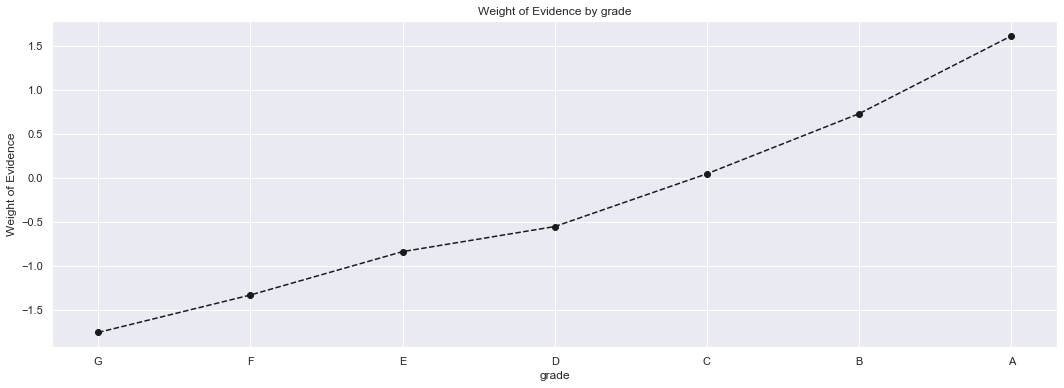

In [54]:
plot_by_woe(df_temp)

### Creating Dummy Variables for Discrete Variables

In [55]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,RENT,167644,0.985314,0.398115,165182.0,2462.0,0.397057,0.484837,-0.199732,NaN,NaN,inf
1,OWN,45766,0.987065,0.108684,45174.0,592.0,0.108587,0.116581,-0.071036,0.001751,0.128696,inf
2,MORTGAGE,207682,0.990254,0.493196,205658.0,2024.0,0.494351,0.398582,0.215333,0.003190,0.286368,inf
3,ANY,2,1.000000,0.000005,2.0,0.0,0.000005,0.000000,inf,0.009746,inf,inf


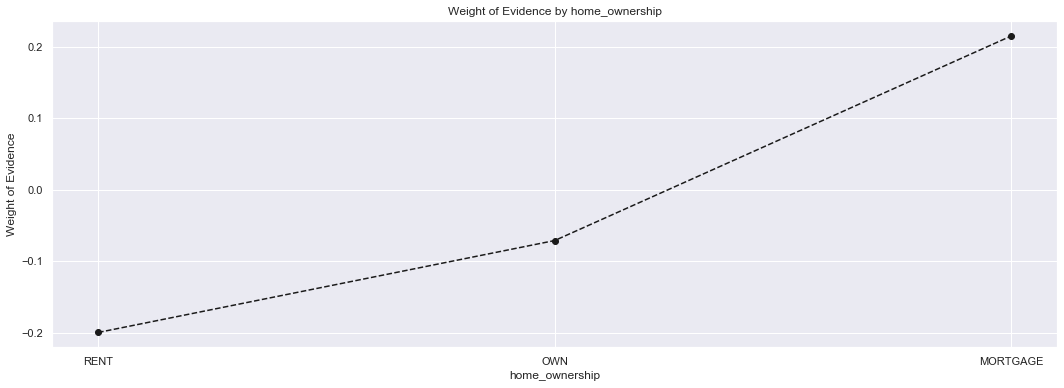

In [56]:
plot_by_woe(df_temp)

The categories Other and None are associated with a very low weight of evidence. Also we see that 'ANY' should be an error as it just has one record. We can remove these observations, but we dont want to lose on these data points. Hence, we combine Other, None & Any category with the next most riskiest category 'RENT'.

In [57]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],
                                                             df_inputs_prepr['home_ownership:ANY']])

In [58]:
df_inputs_prepr['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

We observed that the new population does not have home_ownership variable as 'OTHER' or 'NONE'. We can assume that the financial institution has improved their data collection, and vague classes such as 'OTHER' and 'NONE' have now been eliminated. Since we are not modelling, we only interested in ascertaining the Population change. So we remove these variables from our model.

In [59]:
# State of the borrower
df_inputs_prepr['addr_state'].unique()

array(['DC', 'IN', 'KS', 'IL', 'OR', 'VA', 'PA', 'GA', 'TN', 'OH', 'NY',
       'FL', 'NJ', 'RI', 'NC', 'AL', 'TX', 'SC', 'MD', 'WA', 'MO', 'MN',
       'NH', 'VT', 'AZ', 'MI', 'MA', 'CA', 'LA', 'DE', 'NM', 'CO', 'WI',
       'SD', 'CT', 'NE', 'HI', 'AR', 'MT', 'WV', 'WY', 'OK', 'NV', 'KY',
       'MS', 'ME', 'UT', 'ND', 'AK'], dtype=object)

In [60]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,SD,835,0.978443,0.001983,817.0,18.0,0.001964,0.003545,-0.590539,NaN,NaN,inf
1,NV,5924,0.980419,0.014068,5808.0,116.0,0.013961,0.022844,-0.492405,0.001976,0.098134,inf
2,HI,2083,0.982717,0.004947,2047.0,36.0,0.004920,0.007089,-0.365195,0.002299,0.127210,inf
3,OK,3968,0.984627,0.009423,3907.0,61.0,0.009391,0.012013,-0.246155,0.001910,0.119040,inf
4,NM,2351,0.985113,0.005583,2316.0,35.0,0.005567,0.006892,-0.213557,0.000486,0.032598,inf
5,AK,954,0.985325,0.002266,940.0,14.0,0.002260,0.002757,-0.198984,0.000212,0.014574,inf
6,NY,33844,0.985433,0.080372,33351.0,493.0,0.080168,0.097085,-0.191472,0.000108,0.007511,inf
7,MS,2593,0.985731,0.006158,2556.0,37.0,0.006144,0.007286,-0.170525,0.000298,0.020947,inf
8,FL,29298,0.985801,0.069576,28882.0,416.0,0.069425,0.081922,-0.165518,0.000070,0.005008,inf
9,LA,5098,0.986465,0.012107,5029.0,69.0,0.012088,0.013588,-0.116936,0.000664,0.048581,inf


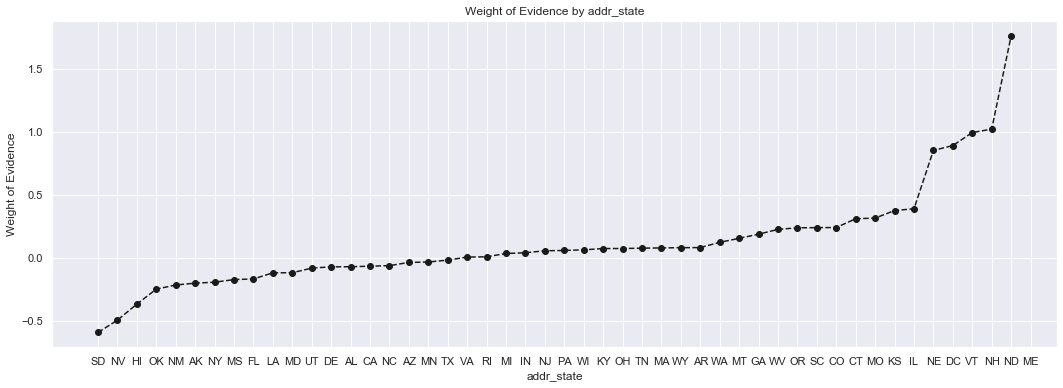

In [61]:
plot_by_woe(df_temp)

We see that there is no record for North Dakota. We might have customers from that state in future. Hence, we add a dummy variable with the values as 0.

We observe that we have 49 states in the new population. We had 50 states + 'North Dakota' in the original population. The states which are missing are Idaho(ID) and Iowa(IA). Lets add these to the new population as dummies.

In [62]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0  
    
if ['addr_state:ID'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ID'] = 0  

if ['addr_state:IA'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:IA'] = 0  

We see that the states Nebraska and Iowa with a considerable lower weight of evidence than most states.
Also Maine and Idaho have a very high weight of evidence. The weight of evidence for these states could not be calculated as there were no bad borrowers in our data from these states.
Let us plot a woe chart without these to understand the others better.

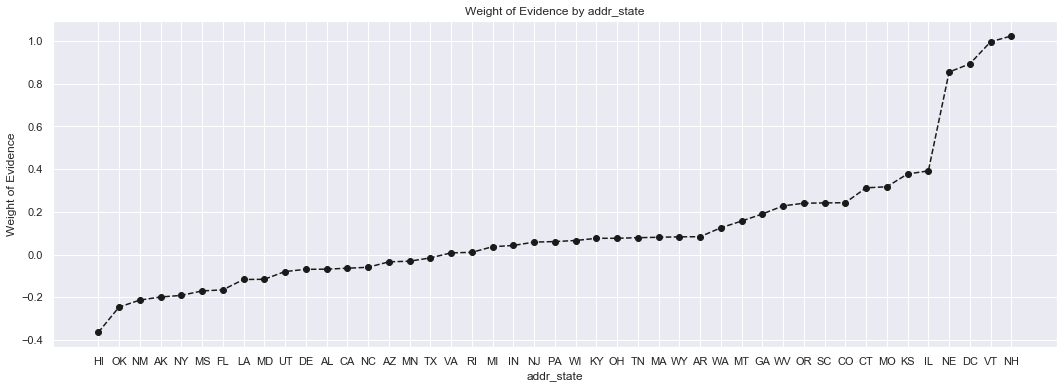

In [63]:
plot_by_woe(df_temp.iloc[2:-2, :])

We see a different perspective. As Nebraska & Iowa were so far away from the other observations, that the initial chart showed that all states have more or less similar weight of evidence. We now see that the first state MT has the lowest weight of evidence. The second, third and fourth states have considerably lower weight of evidence than the following states.

It makes sense to put MT as a separate category and SD, OK, MS as a separate category. However we see that MT does has a only 1125 borrowers. So we combine all these states with reference to OK with 3255 obervations. Further we will also add the NE & IA from the previous chart. 

We also include North Dakota (ND) here as we had no information about it. Since the category in question denotes highest risk category, we include ND here. This follows the conservation principle, that when we have no information, we assume the 'Worst' or highest risk category.

Similarly we combine AK, DC, KS, WY, ID & ME into one category with reference as KS with 3341 observations.

Let us now take a look at the remaining 38 states.

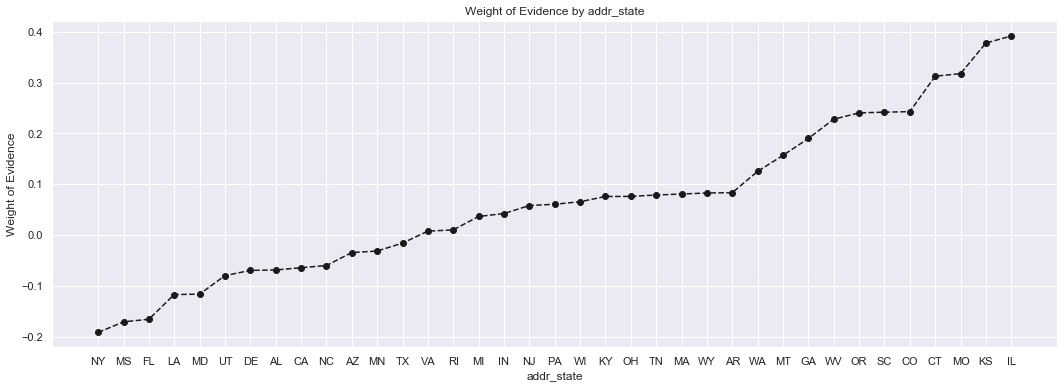

In [64]:
plot_by_woe(df_temp.iloc[6:-6,:])

We will further combine other states based on their similarity of weight of evidence and giving due consideration to the number of observations under each category.

In [65]:
df_inputs_prepr['addr_state:AK_DC_KS_WY_ID_ME'] = sum([df_inputs_prepr['addr_state:AK'],
                                                       df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:KS'],
                                                       df_inputs_prepr['addr_state:WY'],
                                                       df_inputs_prepr['addr_state:ID'],
                                                       df_inputs_prepr['addr_state:ME']])

df_inputs_prepr['addr_state:SD_OK_MS_MT_NE_IA_ND'] = sum([df_inputs_prepr['addr_state:SD'],
                                                       df_inputs_prepr['addr_state:OK'],
                                                       df_inputs_prepr['addr_state:MS'],
                                                       df_inputs_prepr['addr_state:MT'],
                                                       df_inputs_prepr['addr_state:NE'],
                                                       df_inputs_prepr['addr_state:IA'],
                                                       df_inputs_prepr['addr_state:ND']])

df_inputs_prepr['addr_state:TN_HI_NV'] = sum([df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:HI'],
                                              df_inputs_prepr['addr_state:NV']])

df_inputs_prepr['addr_state:AZ_RI_NY'] = sum([df_inputs_prepr['addr_state:AZ'],
                                              df_inputs_prepr['addr_state:RI'],
                                              df_inputs_prepr['addr_state:NY']])

df_inputs_prepr['addr_state:VA_LA'] = sum([df_inputs_prepr['addr_state:VA'],
                                           df_inputs_prepr['addr_state:LA']])

df_inputs_prepr['addr_state:MD_AL_IN_MO'] = sum([df_inputs_prepr['addr_state:MD'],
                                                 df_inputs_prepr['addr_state:AL'],
                                                 df_inputs_prepr['addr_state:IN'],
                                                 df_inputs_prepr['addr_state:MO']])

df_inputs_prepr['addr_state:MA_AR'] = sum([df_inputs_prepr['addr_state:MA'],
                                           df_inputs_prepr['addr_state:AR']])

df_inputs_prepr['addr_state:MI_DE_WI'] = sum([df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:DE'],
                                              df_inputs_prepr['addr_state:WI']])

df_inputs_prepr['addr_state:NC_NM'] = sum([df_inputs_prepr['addr_state:NC'],
                                           df_inputs_prepr['addr_state:NM']])

df_inputs_prepr['addr_state:CO_MN_NH_KY_VT'] = sum([df_inputs_prepr['addr_state:CO'],
                                                    df_inputs_prepr['addr_state:MN'],
                                                    df_inputs_prepr['addr_state:NH'],
                                                    df_inputs_prepr['addr_state:KY'],
                                                    df_inputs_prepr['addr_state:VT']])


df_inputs_prepr['addr_state:AK_KS_WY_ID_ME'] = sum([df_inputs_prepr['addr_state:AK'],
                                                    df_inputs_prepr['addr_state:KS'],
                                                    df_inputs_prepr['addr_state:WY'],
                                                    df_inputs_prepr['addr_state:ID'],
                                                    df_inputs_prepr['addr_state:ME']])

df_inputs_prepr['addr_state:SC_WV_UT'] = sum([df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:WV'],
                                              df_inputs_prepr['addr_state:UT']])


In [66]:
#Verification Status
df_inputs_prepr['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [67]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,Verified,123016,0.984734,0.292134,121138.0,1878.0,0.291186,0.369831,-0.239083,NaN,NaN,0.051796
1,Source Verified,179565,0.987681,0.426425,177353.0,2212.0,0.426313,0.435605,-0.021561,0.002948,0.217522,0.051796
2,Not Verified,118513,0.991663,0.281441,117525.0,988.0,0.282501,0.194565,0.372917,0.003982,0.394479,0.051796


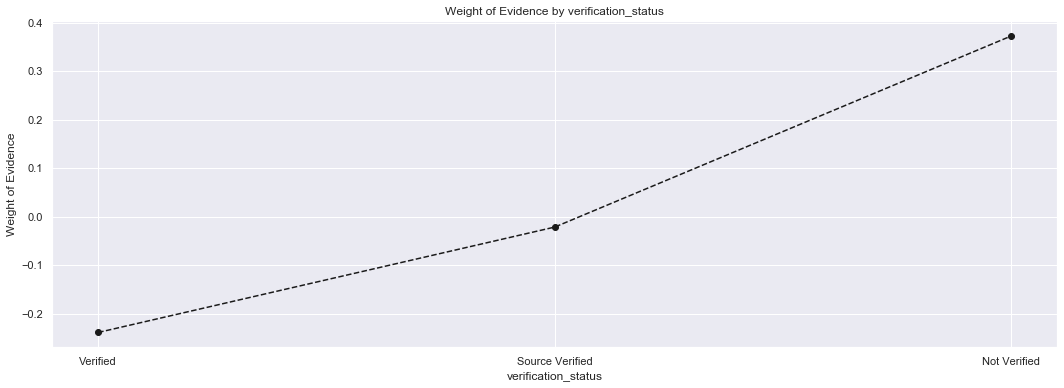

In [68]:
plot_by_woe(df_temp)

In [69]:
#Purpose
df_inputs_prepr['purpose'].unique()

array(['home_improvement', 'credit_card', 'debt_consolidation',
       'major_purchase', 'other', 'medical', 'small_business', 'house',
       'car', 'vacation', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [70]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,wedding,4,0.750000,0.000009,3.0,1.0,0.000007,0.000197,-3.307194,NaN,NaN,inf
1,renewable_energy,224,0.968750,0.000532,217.0,7.0,0.000522,0.001378,-0.971819,0.218750,2.335375,inf
2,small_business,3364,0.973246,0.007989,3274.0,90.0,0.007870,0.017724,-0.811848,0.004496,0.159971,inf
3,moving,2420,0.978512,0.005747,2368.0,52.0,0.005692,0.010240,-0.587249,0.005266,0.224599,inf
4,house,1438,0.980529,0.003415,1410.0,28.0,0.003389,0.005514,-0.486666,0.002016,0.100583,inf
5,medical,3938,0.982478,0.009352,3869.0,69.0,0.009300,0.013588,-0.379161,0.001950,0.107504,inf
6,major_purchase,7449,0.984830,0.017690,7336.0,113.0,0.017634,0.022253,-0.232645,0.002352,0.146516,inf
7,other,19204,0.985263,0.045605,18921.0,283.0,0.045481,0.055731,-0.203225,0.000433,0.029420,inf
8,vacation,2249,0.985327,0.005341,2216.0,33.0,0.005327,0.006499,-0.198855,0.000063,0.004371,inf
9,debt_consolidation,250020,0.986933,0.593739,246753.0,3267.0,0.593133,0.643364,-0.081291,0.001606,0.117564,inf


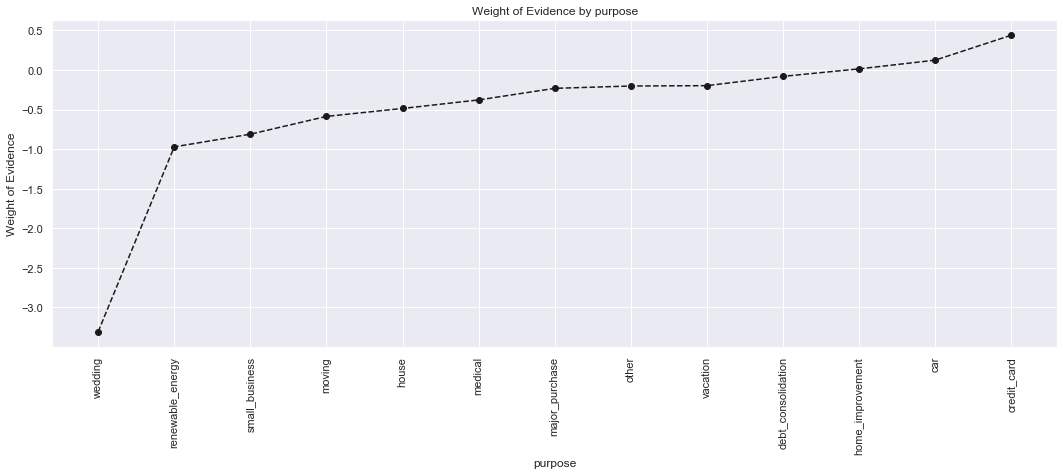

In [71]:
plot_by_woe(df_temp,90)

We see that educational purpose has the lowest weight of evidence, and renewable energy has the highest. But they also have the lowest number of observations among all the categories. Let us plot without these categories.

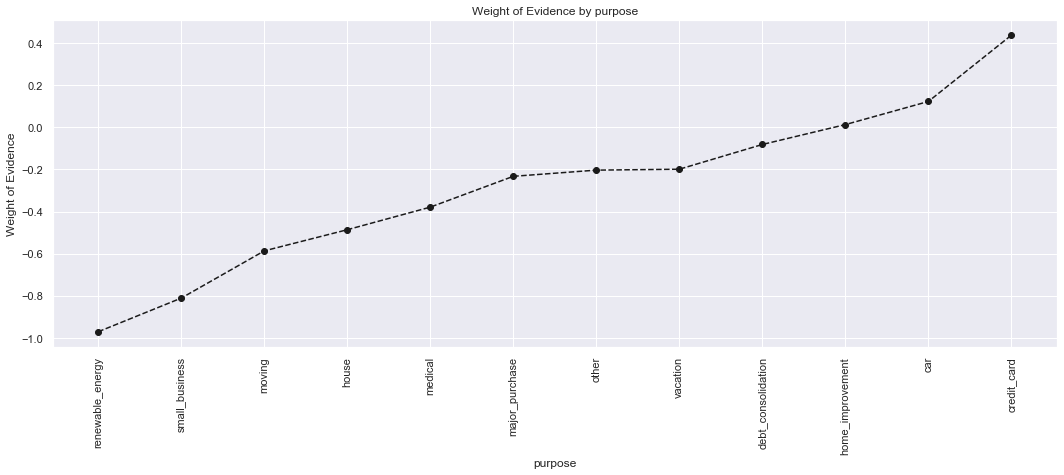

In [72]:
plot_by_woe(df_temp.iloc[1:-1,:],90)

We once again combine the categories based on their similarity of weight of evidence as well their numbers in our dataset.

In [73]:
df_inputs_prepr['purpose:house_moving'] = sum([df_inputs_prepr['purpose:house'],
                                               df_inputs_prepr['purpose:moving']])

df_inputs_prepr['purpose:other_medical'] = sum([df_inputs_prepr['purpose:other'],
                                                df_inputs_prepr['purpose:medical']])

df_inputs_prepr['purpose:vacation_major_purchase'] = sum([df_inputs_prepr['purpose:vacation'],
                                                          df_inputs_prepr['purpose:major_purchase']])

df_inputs_prepr['purpose:wedding_renewable_energy'] = sum([df_inputs_prepr['purpose:wedding'],
                                                           df_inputs_prepr['purpose:renewable_energy']])

In [74]:
# Initial List Status
df_inputs_prepr['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [75]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,f,153843,0.982950,0.365341,151220.0,2623.0,0.363496,0.516542,-0.351389,NaN,NaN,0.095871
1,w,267251,0.990814,0.634659,264796.0,2455.0,0.636504,0.483458,0.275027,0.007864,0.626416,0.095871


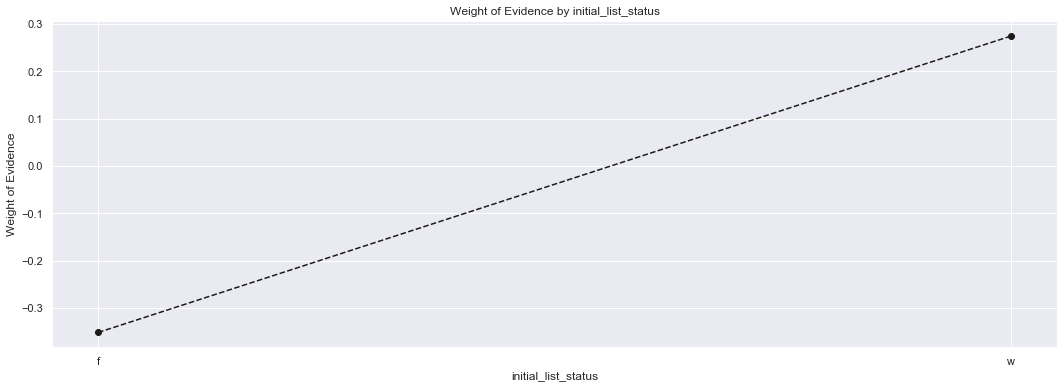

In [76]:
plot_by_woe(df_temp)

In [77]:
# Sub grade
df_inputs_prepr['sub_grade'].unique()

array(['C1', 'A1', 'C5', 'B4', 'B3', 'A4', 'C4', 'C3', 'F1', 'D3', 'B1',
       'E3', 'B5', 'A2', 'A5', 'D1', 'C2', 'B2', 'F2', 'E2', 'D2', 'D5',
       'E4', 'D4', 'F3', 'A3', 'E1', 'F5', 'E5', 'G2', 'G1', 'G3', 'G4',
       'F4', 'G5'], dtype=object)

In [78]:
df_temp = woe_discrete(df_inputs_prepr, 'sub_grade', df_targets_prepr)
df_temp

,sub_grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,G5,191,0.890052,0.000454,170.0,21.0,0.000409,0.004135,-2.314530,NaN,NaN,0.658867
1,G2,575,0.925217,0.001365,532.0,43.0,0.001279,0.008468,-1.890363,0.035165,0.424167,0.658867
2,G3,398,0.942211,0.000945,375.0,23.0,0.000901,0.004529,-1.614374,0.016994,0.275988,0.658867
3,G1,762,0.942257,0.001810,718.0,44.0,0.001726,0.008665,-1.613526,0.000046,0.000848,0.658867
4,G4,241,0.950207,0.000572,229.0,12.0,0.000550,0.002363,-1.456991,0.007950,0.156535,0.658867
5,F4,1342,0.951565,0.003187,1277.0,65.0,0.003070,0.012800,-1.427925,0.001357,0.029066,0.658867
6,F5,1081,0.952821,0.002567,1030.0,51.0,0.002476,0.010043,-1.400318,0.001257,0.027607,0.658867
7,F2,2391,0.954831,0.005678,2283.0,108.0,0.005488,0.021268,-1.354692,0.002009,0.045626,0.658867
8,F3,1725,0.955362,0.004096,1648.0,77.0,0.003961,0.015163,-1.342294,0.000532,0.012398,0.658867
9,F1,3278,0.959732,0.007784,3146.0,132.0,0.007562,0.025994,-1.234721,0.004369,0.107573,0.658867


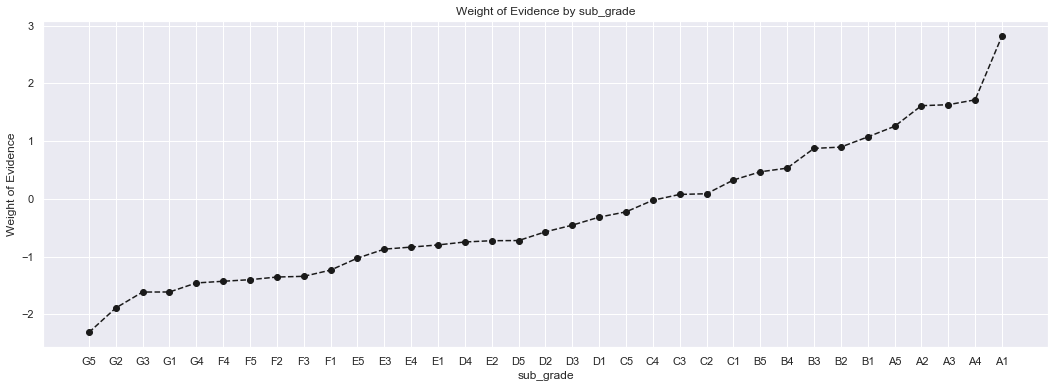

In [79]:
plot_by_woe(df_temp)

In [80]:
df_inputs_prepr['sub_grade:G5_G3_G4'] = sum([df_inputs_prepr['sub_grade:G5'],
                                             df_inputs_prepr['sub_grade:G3'],
                                             df_inputs_prepr['sub_grade:G4']])


df_inputs_prepr['sub_grade:G1_G2_F3_F5'] = sum([df_inputs_prepr['sub_grade:G1'],
                                                df_inputs_prepr['sub_grade:G2'],
                                                df_inputs_prepr['sub_grade:F3'],
                                                df_inputs_prepr['sub_grade:F5']])                                            
                                                             
df_inputs_prepr['sub_grade:E2_E4_F4_E5_F1_F2'] = sum([df_inputs_prepr['sub_grade:E2'],
                                                      df_inputs_prepr['sub_grade:E4'],
                                                      df_inputs_prepr['sub_grade:F4'],
                                                      df_inputs_prepr['sub_grade:E5'],
                                                      df_inputs_prepr['sub_grade:F1'],
                                                      df_inputs_prepr['sub_grade:F2']]) 


## Preprocessing Continuous Variables

In [81]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    # Subsetting the rows
    df = df.iloc[:, [0,1,3]]
    # Renaming the columns
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    # Calculating proportion of good obs
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    # Calculating number of good obs
    df['n_good'] = df['prop_good'] * df['n_obs']
    # Calculating number of bad obs
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WOE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WOE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WOE'] = df['WOE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WOE']
    df['IV'] = df['IV'].sum()
    return df

In [82]:
# Term
df_inputs_prepr['term_int'].unique()

array([60., 36.])

In [83]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,36.0,283172,0.989282,0.672467,280137.0,3035.0,0.67338,0.597676,0.119261,NaN,NaN,0.02481
1,60.0,137922,0.985187,0.327533,135879.0,2043.0,0.32662,0.402324,-0.208461,0.004095,0.327722,0.02481


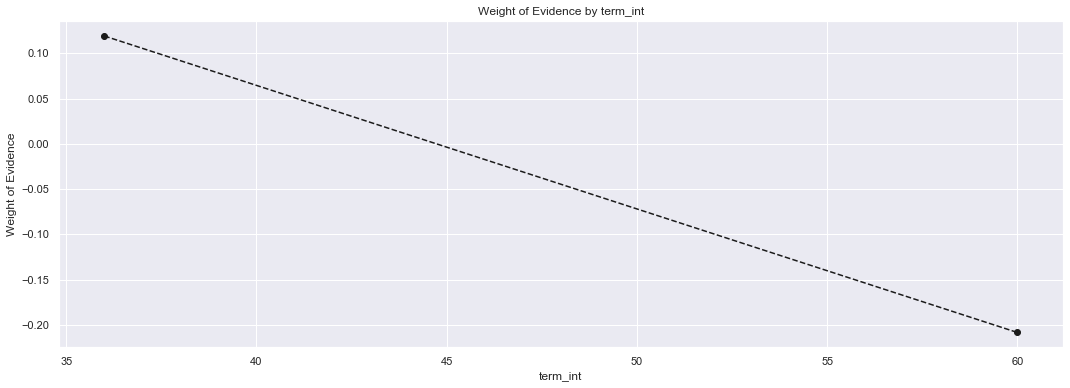

In [84]:
plot_by_woe(df_temp)

In [85]:
# Creating dummy variables
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36.0 ), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60.0 ), 1, 0)

In [86]:
# Employment Length
df_inputs_prepr['emp_length_int'].unique()

array([10.,  0.,  5.,  3.,  4.,  2.,  8.,  9.,  1.,  6.,  7.])

In [87]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,58157,0.985900,0.138109,57337.0,820.0,0.137824,0.161481,-0.158409,NaN,NaN,0.017118
1,1.0,27473,0.986314,0.065242,27097.0,376.0,0.065135,0.074045,-0.128217,0.000414,0.030192,0.017118
2,2.0,37497,0.987146,0.089047,37015.0,482.0,0.088975,0.094919,-0.064672,0.000832,0.063545,0.017118
3,3.0,33430,0.986928,0.079388,32993.0,437.0,0.079307,0.086058,-0.081689,0.000218,0.017017,0.017118
4,4.0,24506,0.987187,0.058196,24192.0,314.0,0.058152,0.061835,-0.061422,0.000259,0.020267,0.017118
5,5.0,24930,0.987645,0.059203,24622.0,308.0,0.059185,0.060654,-0.024510,0.000459,0.036912,0.017118
6,6.0,16838,0.986043,0.039986,16603.0,235.0,0.039910,0.046278,-0.148053,0.001602,0.123543,0.017118
7,7.0,18414,0.986641,0.043729,18168.0,246.0,0.043671,0.048444,-0.103721,0.000597,0.044332,0.017118
8,8.0,21560,0.989425,0.051200,21332.0,228.0,0.051277,0.044900,0.132812,0.002784,0.236532,0.017118
9,9.0,16769,0.989624,0.039822,16595.0,174.0,0.039890,0.034265,0.151995,0.000199,0.019183,0.017118


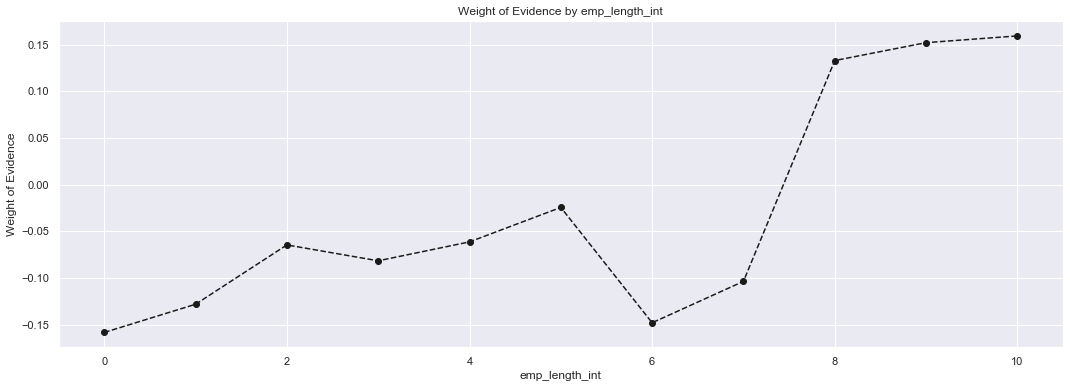

In [88]:
plot_by_woe(df_temp)

Here since all the classes have different weight of evidence, so we create dummy variables for all.

In [89]:
# Classing & creating dummy variables
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0.0]),1,0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1.0]),1,0)
df_inputs_prepr['emp_length:2'] = np.where(df_inputs_prepr['emp_length_int'].isin([2.0]),1,0)
df_inputs_prepr['emp_length:3'] = np.where(df_inputs_prepr['emp_length_int'].isin([3.0]),1,0)
df_inputs_prepr['emp_length:4'] = np.where(df_inputs_prepr['emp_length_int'].isin([4.0]),1,0)
df_inputs_prepr['emp_length:5'] = np.where(df_inputs_prepr['emp_length_int'].isin([5.0]),1,0)
df_inputs_prepr['emp_length:6'] = np.where(df_inputs_prepr['emp_length_int'].isin([6.0]),1,0)
df_inputs_prepr['emp_length:7'] = np.where(df_inputs_prepr['emp_length_int'].isin([7.0]),1,0)
df_inputs_prepr['emp_length:8'] = np.where(df_inputs_prepr['emp_length_int'].isin([8.0]),1,0)
df_inputs_prepr['emp_length:9'] = np.where(df_inputs_prepr['emp_length_int'].isin([9.0]),1,0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10.0]),1,0)

In [90]:
df_inputs_prepr['months_issue_d_date'].unique()

array([24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.])

We will first fine class the values into categories. Next we will determine final categories by combining few of the initial fine class categories into bigger categories, if needed.

In [91]:
df_inputs_prepr['months_issue_d_date_factor'] = pd.cut(df_inputs_prepr['months_issue_d_date'], 50)

In [92]:
df_inputs_prepr['months_issue_d_date_factor']

0         (23.989, 24.22]
1         (23.989, 24.22]
2         (23.989, 24.22]
3         (23.989, 24.22]
4         (23.989, 24.22]
               ...       
421089      (34.78, 35.0]
421090      (34.78, 35.0]
421091      (34.78, 35.0]
421092      (34.78, 35.0]
421093      (34.78, 35.0]
Name: months_issue_d_date_factor, Length: 421094, dtype: category
Categories (50, interval[float64]): [(23.989, 24.22] < (24.22, 24.44] < (24.44, 24.66] < (24.66, 24.88] ... (34.12, 34.34] < (34.34, 34.56] < (34.56, 34.78] < (34.78, 35.0]]

In [93]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'months_issue_d_date_factor', df_targets_prepr)
df_temp

,months_issue_d_date_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(23.989, 24.22]",44342,1.000000,0.105302,44342.0,0.0,0.106587,0.000000,inf,NaN,NaN,inf
1,"(24.22, 24.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(24.44, 24.66]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(24.66, 24.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(24.88, 25.1]",37530,0.998082,0.089125,37458.0,72.0,0.090040,0.014179,1.848503,NaN,NaN,inf
5,"(25.1, 25.32]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(25.32, 25.54]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
7,"(25.54, 25.76]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(25.76, 25.98]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(25.98, 26.2]",48631,0.997327,0.115487,48501.0,130.0,0.116584,0.025601,1.515999,NaN,NaN,inf


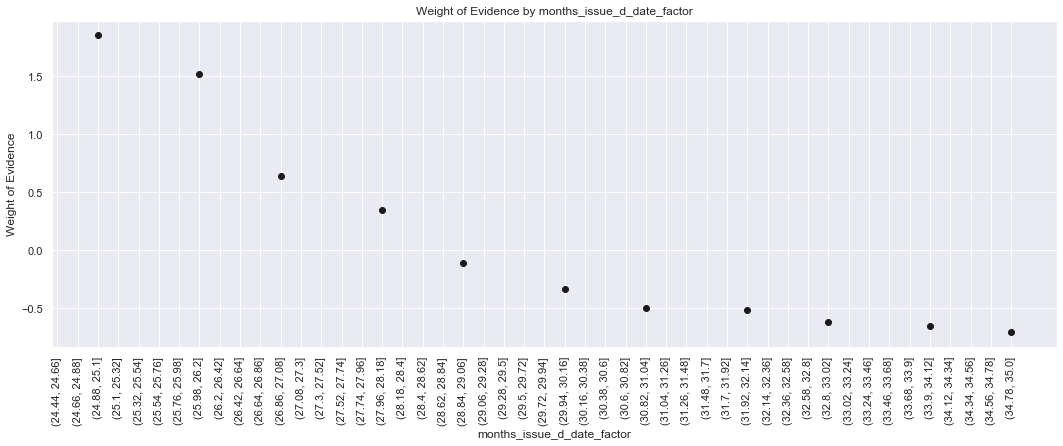

In [94]:
df_temp['months_issue_d_date_factor'] = df_temp['months_issue_d_date_factor'].astype(str)
plot_by_woe(df_temp, 90)

In [95]:
df_inputs_prepr['months_issue_d_date:<49'] = np.where(df_inputs_prepr['months_issue_d_date'].isin(range(49)),1,0)
df_inputs_prepr['months_issue_d_date:49-54'] = np.where(df_inputs_prepr['months_issue_d_date'].isin(range(49,54)),1,0)
df_inputs_prepr['months_issue_d_date:55-61'] = np.where(df_inputs_prepr['months_issue_d_date'].isin(range(54,61)),1,0)
df_inputs_prepr['months_issue_d_date:62-77'] = np.where(df_inputs_prepr['months_issue_d_date'].isin(range(61,77)),1,0)
df_inputs_prepr['months_issue_d_date:>77'] = np.where(df_inputs_prepr['months_issue_d_date'].isin(range(77, int(df_inputs_prepr['months_issue_d_date'].max()))),1,0)


In [96]:
# Exploring Interest Rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [97]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(5.296, 5.793]",9651,0.999689,0.022919,9648.0,3.0,0.023191,0.000591,3.670087,NaN,NaN,inf
1,"(5.793, 6.267]",10214,0.997748,0.024256,10191.0,23.0,0.024497,0.004529,1.687960,0.001941,1.982128,inf
2,"(6.267, 6.74]",6530,0.996478,0.015507,6507.0,23.0,0.015641,0.004529,1.239333,0.001270,0.448626,inf
3,"(6.74, 7.214]",12488,0.997117,0.029656,12452.0,36.0,0.029932,0.007089,1.440311,0.000639,0.200978,inf
4,"(7.214, 7.687]",11416,0.998861,0.027110,11403.0,13.0,0.027410,0.002560,2.370876,0.001744,0.930565,inf
5,"(7.687, 8.16]",20636,0.997189,0.049006,20578.0,58.0,0.049464,0.011422,1.465729,0.001672,0.905148,inf
6,"(8.16, 8.634]",22498,0.996133,0.053428,22411.0,87.0,0.053871,0.017133,1.145593,0.001056,0.320136,inf
7,"(8.634, 9.107]",2020,0.986634,0.004797,1993.0,27.0,0.004791,0.005317,-0.104247,0.009499,1.249840,inf
8,"(9.107, 9.581]",22171,0.995039,0.052651,22061.0,110.0,0.053029,0.021662,0.895280,0.008405,0.999527,inf
9,"(9.581, 10.054]",22364,0.995663,0.053109,22267.0,97.0,0.053524,0.019102,1.030344,0.000624,0.135064,inf


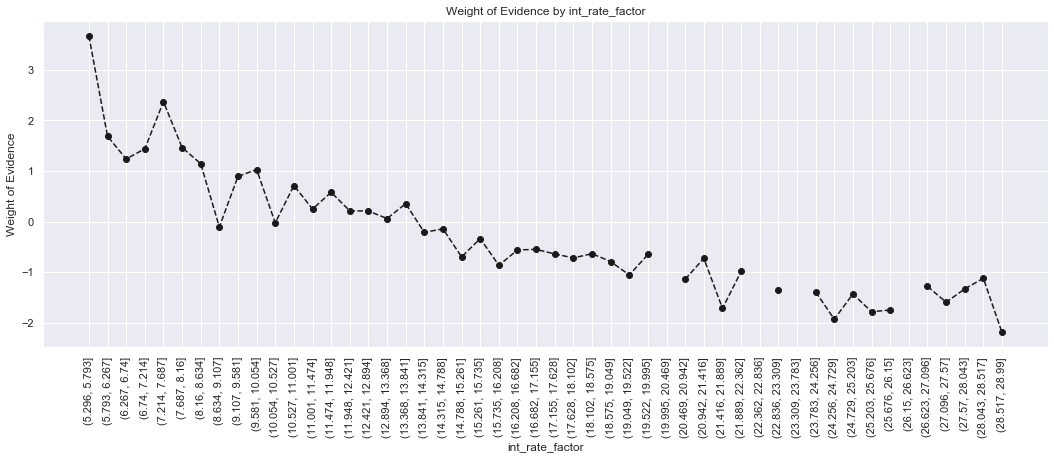

In [98]:
df_temp['int_rate_factor'] = df_temp['int_rate_factor'].astype(str)
plot_by_woe(df_temp, 90)

In [99]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548),1,0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548 ) & (df_inputs_prepr['int_rate'] <= 12.025),1,0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74),1,0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74 )& (df_inputs_prepr['int_rate'] <= 20.281),1,0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281),1,0)

In [100]:
# Exploring funded amount
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'],50)

In [101]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(966.0, 1680.0]",3391,0.988499,0.008053,3352.0,39.0,0.008057,0.007680,0.047945,NaN,NaN,0.030807
1,"(1680.0, 2360.0]",3751,0.988003,0.008908,3706.0,45.0,0.008908,0.008862,0.005240,0.000496,0.042705,0.030807
2,"(2360.0, 3040.0]",8134,0.989058,0.019316,8045.0,89.0,0.019338,0.017527,0.098363,0.001055,0.093124,0.030807
3,"(3040.0, 3720.0]",5133,0.989869,0.012190,5081.0,52.0,0.012213,0.010240,0.176213,0.000811,0.077850,0.030807
4,"(3720.0, 4400.0]",7315,0.988653,0.017371,7232.0,83.0,0.017384,0.016345,0.061624,0.001216,0.114589,0.030807
5,"(4400.0, 5080.0]",18150,0.988650,0.043102,17944.0,206.0,0.043133,0.040567,0.061329,0.000003,0.000295,0.030807
6,"(5080.0, 5760.0]",5617,0.989496,0.013339,5558.0,59.0,0.013360,0.011619,0.139650,0.000846,0.078321,0.030807
7,"(5760.0, 6440.0]",16224,0.989583,0.038528,16055.0,169.0,0.038592,0.033281,0.148071,0.000087,0.008421,0.030807
8,"(6440.0, 7120.0]",10565,0.989210,0.025089,10451.0,114.0,0.025122,0.022450,0.112448,0.000374,0.035622,0.030807
9,"(7120.0, 7800.0]",8423,0.987534,0.020003,8318.0,105.0,0.019994,0.020677,-0.033589,0.001676,0.146038,0.030807


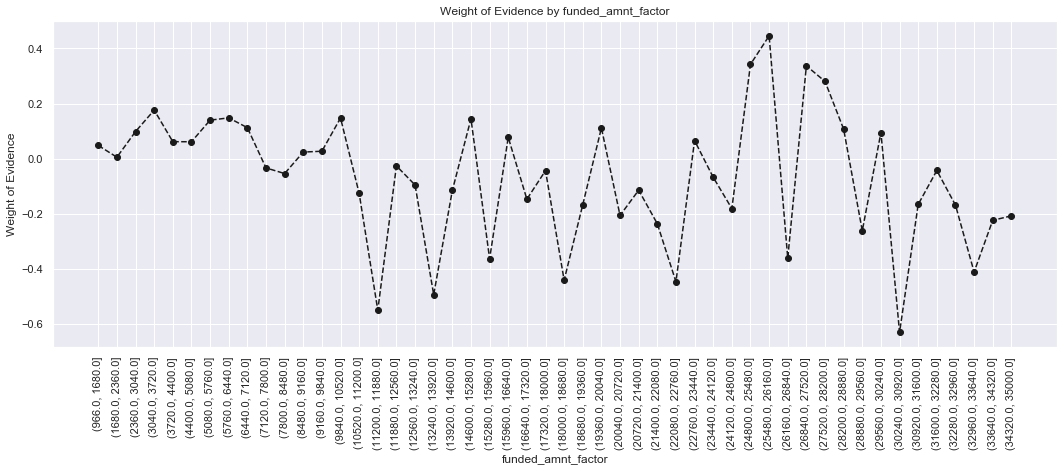

In [102]:
df_temp['funded_amnt_factor'] = df_temp['funded_amnt_factor'].astype(str)
plot_by_woe(df_temp, 90)

We see that there seems to be no association between 'funded amount' and WOE. Hence we will not use this variable in the PD model.

In [103]:
# Exploring months since earliest credit line
df_inputs_prepr['months_since_earliest_cr_line'].unique()

array([346., 209.,  89., 240., 220., 205., 204., 184., 374., 308., 434.,
       246., 199., 195., 207., 165., 217., 123., 289., 415., 208., 215.,
       242., 170., 252., 330., 270., 210., 112., 331., 256., 396., 202.,
       358., 222., 203., 178., 147., 342., 319., 213., 192., 296., 143.,
       274., 198.,  86., 200., 239., 251., 164., 135., 146., 162., 167.,
       303., 157., 376., 229., 174., 150., 344., 282., 193., 388., 188.,
        95., 109., 124., 284., 295., 266., 212., 173., 171., 291.,  82.,
       228., 258., 230., 219., 127., 275., 183., 238., 172., 158., 181.,
       201., 301., 372., 138., 211., 223., 151., 140., 370., 175., 194.,
       179., 356., 423., 351., 130., 152., 332., 232., 302., 176.,  79.,
       214., 187., 373., 355., 117., 131., 450., 182., 492., 226., 426.,
       273., 196., 247., 495., 339., 532., 403., 263., 286.,  88., 216.,
       235., 237., 225., 368., 325., 265., 244., 320., 168., 269., 397.,
       470., 108., 305., 122., 261., 428., 185., 22

In [104]:
df_inputs_prepr['months_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['months_since_earliest_cr_line'], 50)

In [105]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'months_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

,months_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(72.474, 83.52]",2001,0.987506,0.004752,1976.0,25.0,0.004750,0.004923,-0.035852,NaN,NaN,0.050023
1,"(83.52, 94.04]",4886,0.982808,0.011603,4802.0,84.0,0.011543,0.016542,-0.359835,0.004698,0.323983,0.050023
2,"(94.04, 104.56]",4610,0.980694,0.010948,4521.0,89.0,0.010867,0.017527,-0.477954,0.002114,0.118119,0.050023
3,"(104.56, 115.08]",5446,0.984943,0.012933,5364.0,82.0,0.012894,0.016148,-0.225060,0.004249,0.252894,0.050023
4,"(115.08, 125.6]",6146,0.977546,0.014595,6008.0,138.0,0.014442,0.027176,-0.632213,0.007397,0.407152,0.050023
5,"(125.6, 136.12]",10200,0.986176,0.024223,10059.0,141.0,0.024179,0.027767,-0.138343,0.008630,0.493870,0.050023
6,"(136.12, 146.64]",11155,0.983953,0.026491,10976.0,179.0,0.026384,0.035250,-0.289726,0.002223,0.151383,0.050023
7,"(146.64, 157.16]",15641,0.984911,0.037144,15405.0,236.0,0.037030,0.046475,-0.227191,0.000958,0.062535,0.050023
8,"(157.16, 167.68]",18480,0.986093,0.043886,18223.0,257.0,0.043804,0.050610,-0.144443,0.001182,0.082748,0.050023
9,"(167.68, 178.2]",24374,0.984615,0.057883,23999.0,375.0,0.057688,0.073848,-0.246965,0.001478,0.102522,0.050023


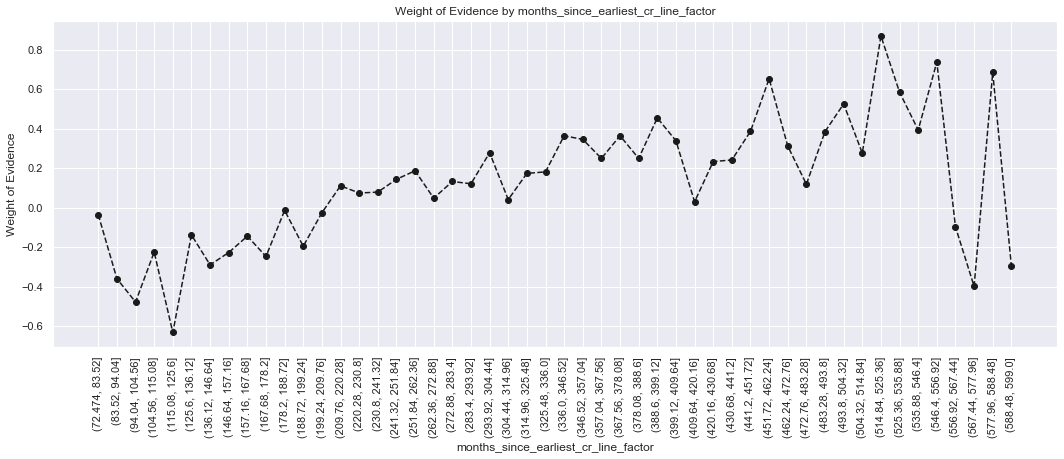

In [106]:
df_temp['months_since_earliest_cr_line_factor'] = df_temp['months_since_earliest_cr_line_factor'].astype(str)
plot_by_woe(df_temp, 90)

In [107]:
df_inputs_prepr['months_since_earliest_cr_line:<153'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(153)),1,0)
df_inputs_prepr['months_since_earliest_cr_line:154-258'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(153,258)),1,0)
df_inputs_prepr['months_since_earliest_cr_line:<258-387'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(258,387)),1,0)
df_inputs_prepr['months_since_earliest_cr_line:<387'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(258,int(df_inputs_prepr['months_since_earliest_cr_line'].max()))),1,0)                                                                  

In [108]:
# Exploring Installment 
df_inputs_prepr['installment'].unique()

array([778.38, 260.5 , 146.16, ..., 459.22, 237.86, 220.37])

In [109]:
len(df_inputs_prepr['installment'].unique())

40447

In [110]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'],50)

In [111]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(28.705, 58.427]",3506,0.988876,0.008326,3467.0,39.0,0.008334,0.007680,0.081677,NaN,NaN,inf
1,"(58.427, 86.734]",5832,0.987654,0.013850,5760.0,72.0,0.013846,0.014179,-0.023780,0.001222,0.105457,inf
2,"(86.734, 115.04]",8123,0.990890,0.019290,8049.0,74.0,0.019348,0.014573,0.283432,0.003236,0.307211,inf
3,"(115.04, 143.347]",9139,0.988948,0.021703,9038.0,101.0,0.021725,0.019890,0.088266,0.001942,0.195165,inf
4,"(143.347, 171.654]",17953,0.990531,0.042634,17783.0,170.0,0.042746,0.033478,0.244394,0.001582,0.156127,inf
5,"(171.654, 199.961]",15515,0.990332,0.036845,15365.0,150.0,0.036934,0.029539,0.223406,0.000199,0.020988,inf
6,"(199.961, 228.268]",16515,0.989888,0.039219,16348.0,167.0,0.039297,0.032887,0.178061,0.000444,0.045345,inf
7,"(228.268, 256.574]",22043,0.988749,0.052347,21795.0,248.0,0.052390,0.048838,0.070201,0.001139,0.107860,inf
8,"(256.574, 284.881]",25323,0.987679,0.060136,25011.0,312.0,0.060120,0.061442,-0.021738,0.001070,0.091939,inf
9,"(284.881, 313.188]",24135,0.988150,0.057315,23849.0,286.0,0.057327,0.056321,0.017700,0.000471,0.039438,inf


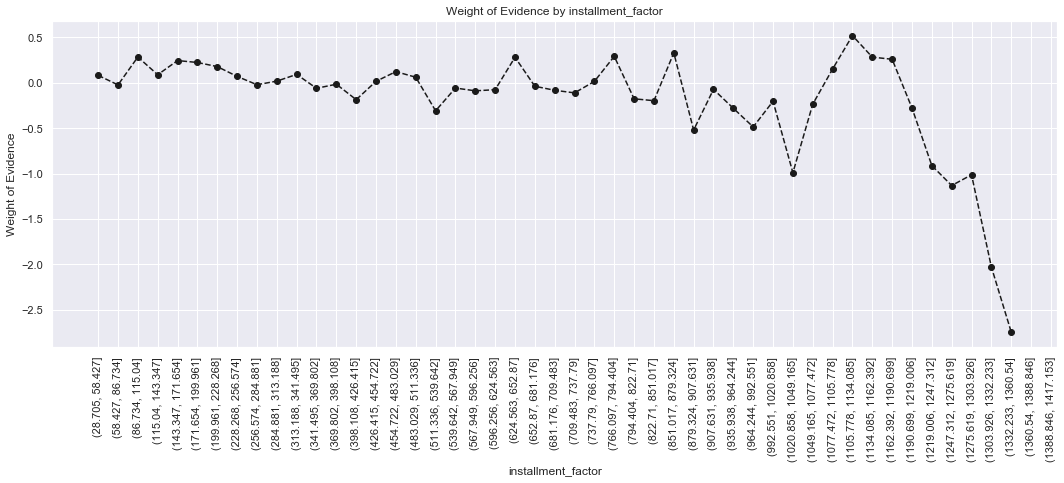

In [112]:
df_temp['installment_factor'] = df_temp['installment_factor'].astype(str)
plot_by_woe(df_temp, 90)

We see that there seems to be no association between 'installment' and WOE. Hence we will not use this variable in the PD model.

In [113]:
# Exploring delinq_2yrs
df_inputs_prepr['delinq_2yrs'].unique()

array([ 0.,  2.,  1.,  3.,  4.,  6.,  5., 15.,  7.,  9., 10.,  8., 11.,
       13., 14., 12., 30., 18., 16., 17., 26., 20., 19., 22., 27., 39.])

In [114]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,334007,0.988419,0.793189,330139.0,3868.0,0.793573,0.761717,0.040970,NaN,NaN,inf
1,1.0,57000,0.986737,0.135362,56244.0,756.0,0.135197,0.148878,-0.096393,0.001683,0.137363,inf
2,2.0,17241,0.985268,0.040943,16987.0,254.0,0.040833,0.050020,-0.202937,0.001469,0.106544,inf
3,3.0,6293,0.984268,0.014944,6194.0,99.0,0.014889,0.019496,-0.269590,0.000999,0.066653,inf
4,4.0,2949,0.983384,0.007003,2900.0,49.0,0.006971,0.009649,-0.325161,0.000884,0.055571,inf
5,5.0,1475,0.983051,0.003503,1450.0,25.0,0.003485,0.004923,-0.345363,0.000333,0.020203,inf
6,6.0,842,0.988124,0.002000,832.0,10.0,0.002000,0.001969,0.015441,0.005073,0.360804,inf
7,7.0,438,0.986301,0.001040,432.0,6.0,0.001038,0.001182,-0.129140,0.001822,0.144581,inf
8,8.0,284,0.989437,0.000674,281.0,3.0,0.000675,0.000591,0.133936,0.003135,0.263076,inf
9,9.0,173,0.988439,0.000411,171.0,2.0,0.000411,0.000394,0.042710,0.000997,0.091226,inf


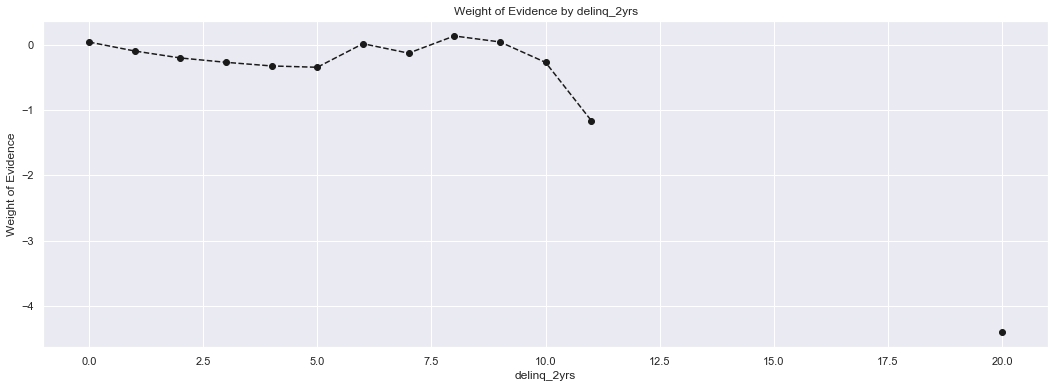

In [115]:
plot_by_woe(df_temp)

In [116]:
df_inputs_prepr['delinq_2yrs:<5'] = np.where((df_inputs_prepr['delinq_2yrs'] <= 5.0),1,0)
df_inputs_prepr['delinq_2yrs:5-10'] = np.where((df_inputs_prepr['delinq_2yrs'] > 5.0) & (df_inputs_prepr['delinq_2yrs'] < 10.0),1,0)
df_inputs_prepr['delinq_2yrs:>10'] = np.where((df_inputs_prepr['delinq_2yrs'] > 10.0),1,0)

In [117]:
# Exploring inq_last_6mths
df_inputs_prepr['inq_last_6mths'].unique()

array([0., 1., 3., 4., 2., 5., 6.])

In [118]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,256407,0.990086,0.608907,253865.0,2542.0,0.610229,0.500591,0.198045,NaN,NaN,0.064229
1,1.0,111346,0.986268,0.264421,109817.0,1529.0,0.263973,0.301103,-0.131605,0.003818,0.329650,0.064229
2,2.0,36292,0.983219,0.086185,35683.0,609.0,0.085773,0.119929,-0.335195,0.003049,0.203590,0.064229
3,3.0,12272,0.977510,0.029143,11996.0,276.0,0.028835,0.054352,-0.633879,0.005710,0.298684,0.064229
4,4.0,3517,0.975832,0.008352,3432.0,85.0,0.008250,0.016739,-0.707559,0.001678,0.073680,0.064229
5,5.0,1217,0.971241,0.002890,1182.0,35.0,0.002841,0.006892,-0.886191,0.004591,0.178632,0.064229
6,6.0,43,0.953488,0.000102,41.0,2.0,0.000099,0.000394,-1.385381,0.017752,0.499190,0.064229


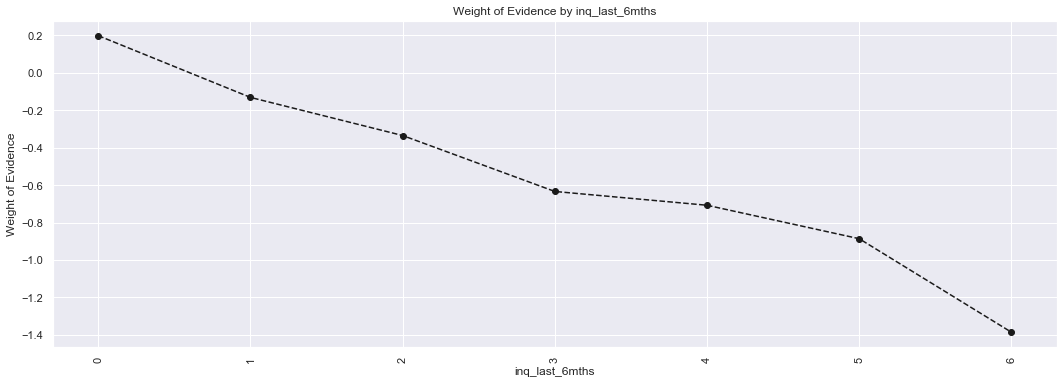

In [119]:
plot_by_woe(df_temp, 90)

In [120]:
df_inputs_prepr['inq_last_6mths:<4'] = np.where((df_inputs_prepr['inq_last_6mths'] <= 4.0),1,0)
df_inputs_prepr['inq_last_6mths:4-6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 4.0) & (df_inputs_prepr['inq_last_6mths'] < 6.0),1,0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6.0),1,0)

In [121]:
# Exploring open_acc
df_inputs_prepr['open_acc'].unique()

array([17., 15.,  6., 10.,  7.,  9.,  5., 30., 12., 21., 18., 13.,  8.,
       16.,  4., 11., 33., 14.,  3., 28., 19., 24., 20., 22., 29., 27.,
       23., 25., 26., 34., 46.,  2., 35., 32., 40., 55., 37., 39., 31.,
       36., 38., 47., 44.,  1., 42., 41., 43., 52., 45., 53., 65., 51.,
       58., 67., 49., 50., 57., 48., 66., 54., 68., 61., 70., 60., 56.,
       82., 63., 59., 64., 62., 79., 74., 90.])

In [122]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,1.0,90,0.988889,0.000214,89.0,1.0,0.000214,0.000197,0.082830,NaN,NaN,inf
1,2.0,986,0.981744,0.002342,968.0,18.0,0.002327,0.003545,-0.420946,0.007144,0.503776,inf
2,3.0,4119,0.991746,0.009782,4085.0,34.0,0.009819,0.006696,0.382910,0.010001,0.803856,inf
3,4.0,10779,0.985991,0.025598,10628.0,151.0,0.025547,0.029736,-0.151839,0.005754,0.534749,inf
4,5.0,18222,0.987433,0.043273,17993.0,229.0,0.043251,0.045096,-0.041790,0.001441,0.110049,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
68,70.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
69,74.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
70,79.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
71,82.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf


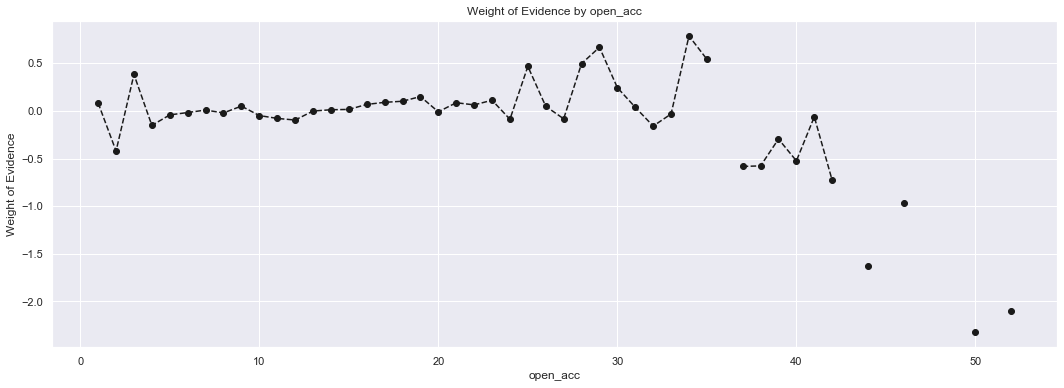

In [123]:
plot_by_woe(df_temp)

We see that except the '0' value for the open acc, we cannot see any significant relationship between woe and open acc. Moreover, we have only 30 observations for the '0' value. Hence, we will omit this variable from our PD model.

In [124]:
# Exploring pub_rec
df_inputs_prepr['pub_rec'].unique()

array([ 0.,  2.,  1.,  3.,  5.,  4., 11.,  7.,  6.,  9.,  8., 10., 23.,
       12., 15., 26., 17., 13., 28., 20., 86., 18., 21., 14., 16., 19.,
       49., 22.])

In [125]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,346679,0.988122,0.823282,342561.0,4118.0,0.823432,0.810949,0.015276,NaN,NaN,inf
1,1.0,60215,0.986947,0.142997,59429.0,786.0,0.142853,0.154785,-0.080225,0.001175,0.095501,inf
2,2.0,9230,0.988732,0.021919,9126.0,104.0,0.021937,0.020481,0.068686,0.001786,0.148911,inf
3,3.0,2876,0.986092,0.006830,2836.0,40.0,0.006817,0.007877,-0.144536,0.002641,0.213221,inf
4,4.0,1044,0.981801,0.002479,1025.0,19.0,0.002464,0.003742,-0.417797,0.004291,0.273262,inf
5,5.0,481,0.987526,0.001142,475.0,6.0,0.001142,0.001182,-0.034251,0.005725,0.383546,inf
6,6.0,249,0.987952,0.000591,246.0,3.0,0.000591,0.000591,0.000913,0.000426,0.035164,inf
7,7.0,108,1.000000,0.000256,108.0,0.0,0.000260,0.000000,inf,0.012048,inf,inf
8,8.0,84,1.000000,0.000199,84.0,0.0,0.000202,0.000000,inf,0.000000,NaN,inf
9,9.0,34,0.970588,0.000081,33.0,1.0,0.000079,0.000197,-0.909299,0.029412,inf,inf


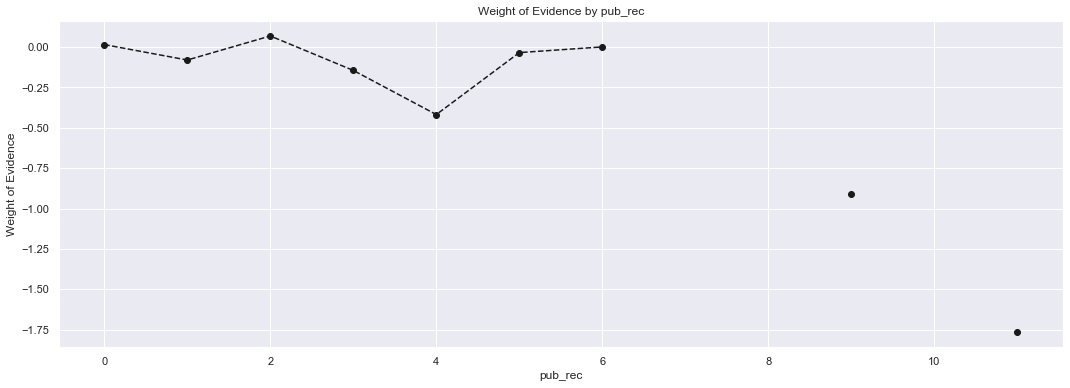

In [126]:
plot_by_woe(df_temp)

We observe no significant relationship between WOE and pub_rec. Hence, we omit this variable from our PD model.

In [127]:
#Exploring total_acc
df_inputs_prepr['total_acc'].unique()

array([ 46.,  24.,   6.,  23.,  18.,  31.,  19.,  13.,  47.,  21.,  35.,
        33.,  22.,  17.,  32.,   7.,  14.,   9.,  72.,  20.,  39.,  37.,
        34.,  27.,  26.,   5.,  69.,  15.,  28.,  25.,  29.,  16.,  38.,
        12.,  10.,  63.,  44.,  43.,  48.,  11.,  36.,  42.,  30.,  49.,
        54.,  53.,  52.,  56.,  40.,  41.,  62.,  45.,  68.,  64.,  58.,
        61.,  65.,   8.,  87.,  50.,   4.,  66.,  59.,  60.,  51.,  89.,
        70.,  71.,  57.,  55.,  77.,  75.,  73.,  67.,  76., 105.,  74.,
       102.,  98.,  85.,  81.,  78.,  83.,  79., 111.,  84.,  86.,  94.,
        97.,  90.,  82.,  93., 127.,  96., 101.,  91.,  80., 112., 125.,
       110.,  95.,  88.,  92., 109., 135.,  99., 106., 104., 151., 130.,
       107., 113., 169., 140., 146., 100., 116., 129., 126., 137., 103.,
       124., 138., 162., 114., 108.])

In [128]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc', df_targets_prepr)
df_temp

,total_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,4.0,1369,0.983199,0.003251,1346.0,23.0,0.003235,0.004529,-0.336408,NaN,NaN,inf
1,5.0,2258,0.985385,0.005362,2225.0,33.0,0.005348,0.006499,-0.194802,0.002186,0.141606,inf
2,6.0,3192,0.984336,0.007580,3142.0,50.0,0.007553,0.009846,-0.265214,0.001049,0.070413,inf
3,7.0,4514,0.984714,0.010720,4445.0,69.0,0.010685,0.013588,-0.240378,0.000378,0.024837,inf
4,8.0,5714,0.986699,0.013569,5638.0,76.0,0.013552,0.014967,-0.099255,0.001985,0.141123,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
121,140.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
122,146.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
123,151.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
124,162.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf


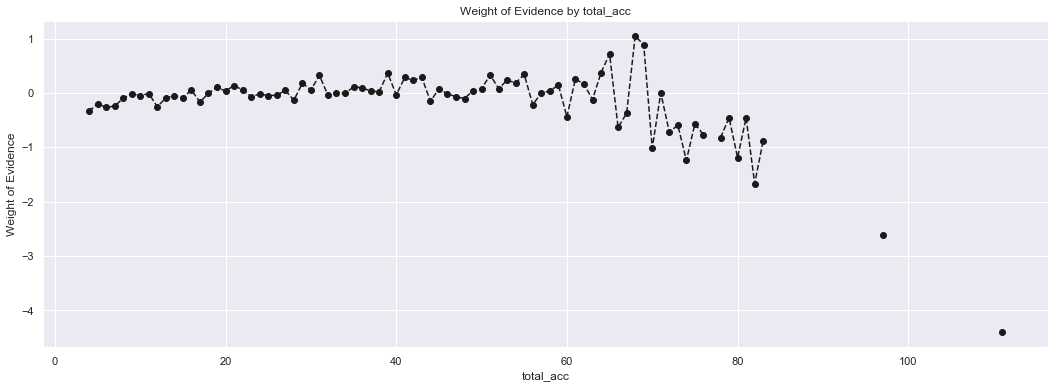

In [129]:
plot_by_woe(df_temp)

No significant relationship between WOE and total_acc can be observed. We omit this variable from our PD model.

In [130]:
# Exploring acc_now_delinq
df_inputs_prepr['acc_now_delinq'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  5.,  6., 14.])

In [131]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,418712,0.987997,0.994343,413686.0,5026.0,0.994399,0.989760,0.004677,NaN,NaN,inf
1,1.0,2243,0.979046,0.005327,2196.0,47.0,0.005279,0.009256,-0.561561,0.008951,0.566238,inf
2,2.0,116,0.965517,0.000275,112.0,4.0,0.000269,0.000788,-1.073602,0.013529,0.512041,inf
3,3.0,17,1.000000,0.000040,17.0,0.0,0.000041,0.000000,inf,0.034483,inf,inf
4,4.0,3,0.666667,0.000007,2.0,1.0,0.000005,0.000197,-3.712659,0.333333,inf,inf
5,5.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.333333,inf,inf
6,6.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf
7,14.0,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.000000,NaN,inf


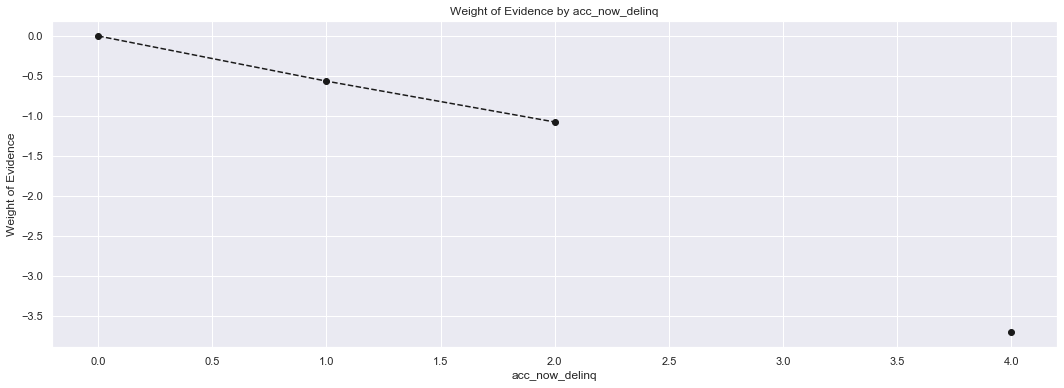

In [132]:
plot_by_woe(df_temp)

In [133]:
df_inputs_prepr['acc_now_delinq:<1'] = np.where((df_inputs_prepr['acc_now_delinq'] <= 1.00),1,0)
df_inputs_prepr['acc_now_delinq:>1'] = np.where((df_inputs_prepr['acc_now_delinq'] > 1.00),1,0)

In [134]:
# Exploring Annual Income
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-9500.0, 190000.0]",409693,0.987842,0.972925,404712.0,4981.0,0.972828,0.980898,-0.008261,NaN,NaN,inf
1,"(190000.0, 380000.0]",10007,0.991306,0.023764,9920.0,87.0,0.023845,0.017133,0.330594,0.003464,0.338855,inf
2,"(380000.0, 570000.0]",943,0.991516,0.002239,935.0,8.0,0.002248,0.001575,0.355299,0.000210,0.024705,inf
3,"(570000.0, 760000.0]",257,1.000000,0.000610,257.0,0.0,0.000618,0.000000,inf,0.008484,inf,inf
4,"(760000.0, 950000.0]",70,1.000000,0.000166,70.0,0.0,0.000168,0.000000,inf,0.000000,NaN,inf
5,"(950000.0, 1140000.0]",43,1.000000,0.000102,43.0,0.0,0.000103,0.000000,inf,0.000000,NaN,inf
6,"(1140000.0, 1330000.0]",20,0.950000,0.000047,19.0,1.0,0.000046,0.000197,-1.461367,0.050000,inf,inf
7,"(1330000.0, 1520000.0]",14,1.000000,0.000033,14.0,0.0,0.000034,0.000000,inf,0.050000,inf,inf
8,"(1520000.0, 1710000.0]",3,0.666667,0.000007,2.0,1.0,0.000005,0.000197,-3.712659,0.333333,inf,inf
9,"(1710000.0, 1900000.0]",5,1.000000,0.000012,5.0,0.0,0.000012,0.000000,inf,0.333333,inf,inf


We see that more than 95% of the observations fall within the first income range of -5602.104, 151858.08. Let us try fine classing the variable into 100 classes.

In [135]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'],100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-9500.0, 95000.0]",325648,0.987351,0.773338,321529.0,4119.0,0.772877,0.811146,-0.048329,NaN,NaN,inf
1,"(95000.0, 190000.0]",84045,0.989744,0.199587,83183.0,862.0,0.199951,0.169752,0.163737,0.002392,0.212066,inf
2,"(190000.0, 285000.0]",8186,0.990838,0.019440,8111.0,75.0,0.019497,0.014770,0.277682,0.001094,0.113945,inf
3,"(285000.0, 380000.0]",1821,0.993410,0.004324,1809.0,12.0,0.004348,0.002363,0.609817,0.002572,0.332135,inf
4,"(380000.0, 475000.0]",652,0.992331,0.001548,647.0,5.0,0.001555,0.000985,0.457102,0.001079,0.152714,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(9025000.0, 9120000.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
96,"(9120000.0, 9215000.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
97,"(9215000.0, 9310000.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
98,"(9310000.0, 9405000.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


Even splitting into 100 classes leaves us with more than 65% of the observations in the first income class. From the index no 2 income class, we see that the number of observations are very less as compared to the first two classes. Let us set the lower limit of this class as the threshold of the high income class and combine all subsequent classes into one single class.

In [136]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 150000.00,:]

Now let us observe this set of observations.

In [137]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-150.0, 3000.0]",5,1.000000,0.000013,5.0,0.0,0.000013,0.000000,inf,NaN,NaN,inf
1,"(3000.0, 6000.0]",16,0.937500,0.000040,15.0,1.0,0.000038,0.000206,-1.687276,0.062500,inf,inf
2,"(6000.0, 9000.0]",106,0.990566,0.000266,105.0,1.0,0.000267,0.000206,0.258634,0.053066,1.945910,inf
3,"(9000.0, 12000.0]",669,0.979073,0.001679,655.0,14.0,0.001664,0.002884,-0.549748,0.011493,0.808382,inf
4,"(12000.0, 15000.0]",1193,0.982397,0.002995,1172.0,21.0,0.002978,0.004326,-0.373382,0.003324,0.176367,inf
5,"(15000.0, 18000.0]",1735,0.975793,0.004355,1693.0,42.0,0.004302,0.008653,-0.698738,0.006605,0.325357,inf
6,"(18000.0, 21000.0]",3187,0.981487,0.008000,3128.0,59.0,0.007949,0.012155,-0.424715,0.005695,0.274024,inf
7,"(21000.0, 24000.0]",4368,0.985348,0.010965,4304.0,64.0,0.010937,0.013185,-0.186909,0.003861,0.237805,inf
8,"(24000.0, 27000.0]",6921,0.985840,0.017373,6823.0,98.0,0.017338,0.020190,-0.152239,0.000492,0.034670,inf
9,"(27000.0, 30000.0]",10984,0.985160,0.027572,10821.0,163.0,0.027498,0.033581,-0.199832,0.000680,0.047593,inf


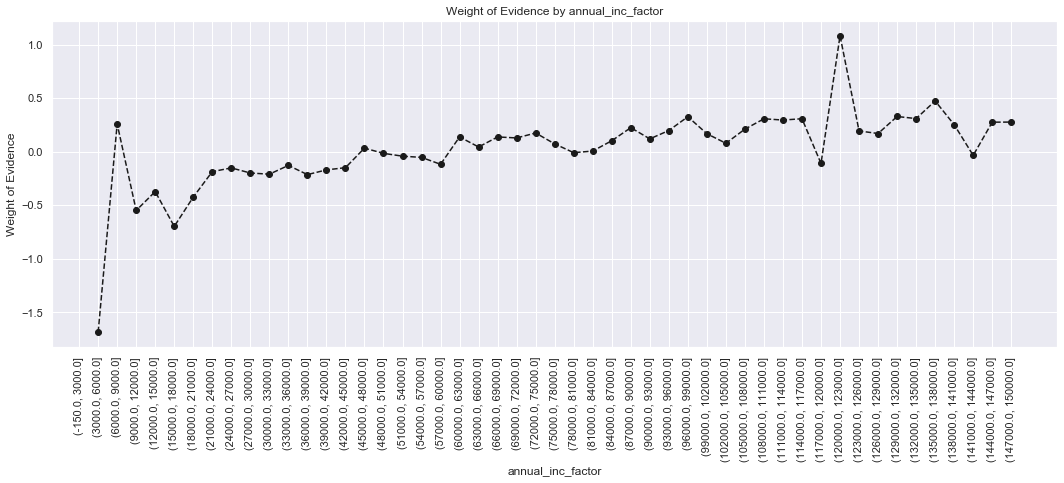

In [138]:
df_temp['annual_inc_factor'] = df_temp['annual_inc_factor'].astype(str)
plot_by_woe(df_temp,90)

We can split the valriable using fine classing with an interval width of $10000. But we observe that the first 5 classes and th bottom 8 classes have very few number of observations. So we conduct coarse classing.

In [139]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000),1,0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <=30000),1,0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <=40000),1,0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <=50000),1,0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <=60000),1,0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <=70000),1,0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <=80000),1,0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <=90000),1,0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <=100000),1,0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <=120000),1,0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <=140000),1,0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000),1,0)


In [140]:
# Exploring months since last delinquency
sum(df_inputs_prepr['mths_since_last_delinq'].isnull())/len(df_inputs_prepr['mths_since_last_delinq'])*100

48.43597866509615

As seen before, there are a lot of missing values for this categorical variable. So we create a Missing Dummy variable. Then we can conduct fine classing or coarse classing of all the non-missing variables.

In [141]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor',df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-0.176, 3.52]",7261,0.982372,0.033440,7133.0,128.0,0.033260,0.047886,-0.364465,NaN,NaN,inf
1,"(3.52, 7.04]",15763,0.984711,0.072596,15522.0,241.0,0.072377,0.090161,-0.219705,0.002339,0.144760,inf
2,"(7.04, 10.56]",12365,0.985119,0.056947,12181.0,184.0,0.056798,0.068837,-0.192225,0.000408,0.027480,inf
3,"(10.56, 14.08]",16125,0.986605,0.074263,15909.0,216.0,0.074182,0.080808,-0.085560,0.001485,0.106665,inf
4,"(14.08, 17.6]",11384,0.986297,0.052429,11228.0,156.0,0.052355,0.058361,-0.108612,0.000308,0.023052,inf
5,"(17.6, 21.12]",14291,0.989014,0.065817,14134.0,157.0,0.065905,0.058736,0.115171,0.002718,0.223783,inf
6,"(21.12, 24.64]",10544,0.988050,0.048560,10418.0,126.0,0.048578,0.047138,0.030087,0.000964,0.085084,inf
7,"(24.64, 28.16]",13761,0.987356,0.063376,13587.0,174.0,0.063354,0.065095,-0.027108,0.000695,0.057195,inf
8,"(28.16, 31.68]",9867,0.989358,0.045442,9762.0,105.0,0.045519,0.039282,0.147370,0.002003,0.174479,inf
9,"(31.68, 35.2]",12583,0.989748,0.057951,12454.0,129.0,0.058071,0.048260,0.185063,0.000390,0.037693,inf


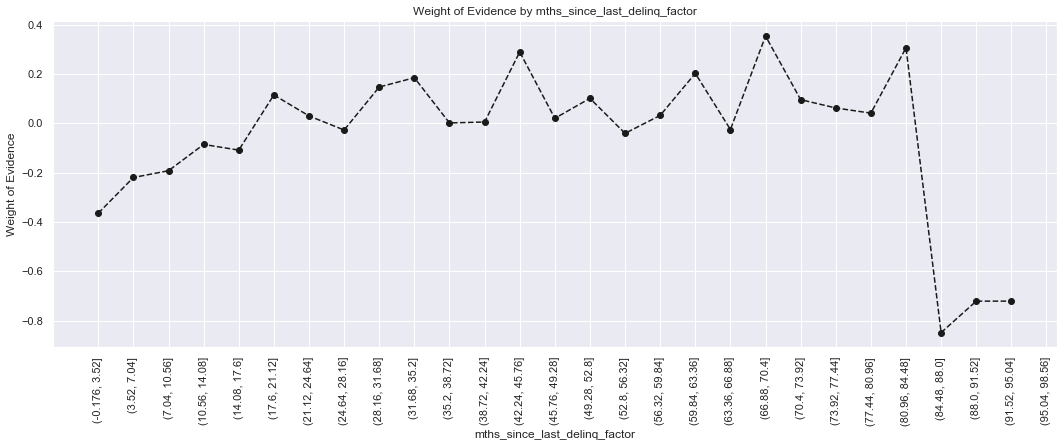

In [142]:
df_temp['mths_since_last_delinq_factor'] = df_temp['mths_since_last_delinq_factor'].astype(str)
plot_by_woe(df_temp,90)

In [143]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()),1,0)
df_inputs_prepr['mths_since_last_delinq:0-7'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >=0) & (df_inputs_prepr['mths_since_last_delinq']<7),1,0)
df_inputs_prepr['mths_since_last_delinq:7-18'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >=7) & (df_inputs_prepr['mths_since_last_delinq']<18),1,0)
df_inputs_prepr['mths_since_last_delinq:18-36'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >=18) & (df_inputs_prepr['mths_since_last_delinq']<36),1,0)
df_inputs_prepr['mths_since_last_delinq:36-54'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >=36) & (df_inputs_prepr['mths_since_last_delinq']<54),1,0)
df_inputs_prepr['mths_since_last_delinq:54-82'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >=54) & (df_inputs_prepr['mths_since_last_delinq']<82),1,0)
df_inputs_prepr['mths_since_last_delinq:>=82'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=82),1,0)

In [144]:
# Exploring dti
len(df_inputs_prepr['dti'].unique())

4086

In [145]:
# Fine classing dti
df_inputs_prepr_temp['dti'] = pd.cut((df_inputs_prepr['dti']),50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti', df_targets_prepr)
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dti,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-9.999, 199.98]",217129,0.987689,0.999982,214456.0,2673.0,0.999981,1.0,-0.000019,NaN,NaN,inf
1,"(199.98, 399.96]",1,1.000000,0.000005,1.0,0.0,0.000005,0.0,inf,0.012311,inf,inf
2,"(399.96, 599.94]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(599.94, 799.92]",1,1.000000,0.000005,1.0,0.0,0.000005,0.0,inf,NaN,NaN,inf
4,"(799.92, 999.9]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(999.9, 1199.88]",1,1.000000,0.000005,1.0,0.0,0.000005,0.0,inf,NaN,NaN,inf
6,"(1199.88, 1399.86]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
7,"(1399.86, 1599.84]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(1599.84, 1799.82]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(1799.82, 1999.8]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


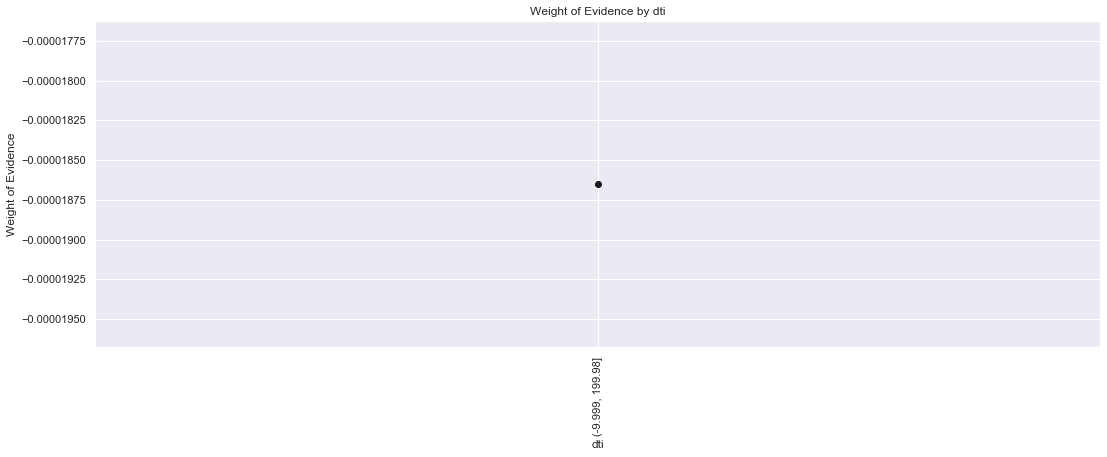

In [146]:
df_temp['dti'] = df_temp['dti'].astype(str)
plot_by_woe(df_temp, 90)

In [147]:
# Coarse Classing
df_inputs_prepr['dti:<12'] = np.where((df_inputs_prepr['dti'] < 12),1,0)
df_inputs_prepr['dti:12-18'] = np.where((df_inputs_prepr['dti']>=12) & (df_inputs_prepr['dti']<18),1,0)
df_inputs_prepr['dti:18-22'] = np.where((df_inputs_prepr['dti']>=18) & (df_inputs_prepr['dti']<22),1,0)
df_inputs_prepr['dti:22-30'] = np.where((df_inputs_prepr['dti']>=22) & (df_inputs_prepr['dti']<30),1,0)
df_inputs_prepr['dti:>30'] = np.where((df_inputs_prepr['dti']>=30),1,0)

In [148]:
# Exploring mths_since_last_record
df_inputs_prepr['mths_since_last_record'].unique()

array([ nan,  67.,  30.,   2.,  12.,  66.,  61.,  89.,  71.,  81.,  75.,
        39.,  86., 106.,  50.,  76.,  57.,  74.,  48.,  91.,  22.,  16.,
        58.,  35.,  47.,  69.,  84.,  46., 113.,  54.,  62.,  68.,  55.,
        56.,  42.,   9.,  53.,  64.,  41.,  27.,  73.,  63.,  83.,  70.,
        28.,  37.,  82., 109.,  95.,  65.,  17.,  23.,  77., 111., 117.,
        11.,  79.,  38., 112.,  78.,  26.,   1.,  92.,  36.,  90.,  80.,
        60.,  51.,  85.,  40.,  24.,  87.,  98.,   8., 115.,  45.,  25.,
        44.,  52., 114.,  13.,  88.,  49., 107., 104., 101.,  97.,  33.,
        94.,  93.,  29., 103.,  72.,  59.,  34., 100.,  14.,  15.,  19.,
       105.,  18.,  31.,  21.,  10., 108.,   5., 116., 102.,  99.,  96.,
        43.,   3.,  32.,  20., 119., 118.,   4., 110.,   7.,   0.,   6.,
       120.])

In [149]:
len(df_inputs_prepr['mths_since_last_record'].unique())

122

In [150]:
sum(df_inputs_prepr['mths_since_last_record'].isnull())/len(df_inputs_prepr['mths_since_last_record'])*100

82.32817375692838

We see that there are 86% missing values in this variable. Hence we create a missing dummy variable. Let us check the non-missing values.

In [151]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr.index])
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-0.12, 2.4]",87,0.965517,0.001169,84.0,3.0,0.001144,0.003125,-1.005290,NaN,NaN,0.063426
1,"(2.4, 4.8]",161,0.968944,0.002164,156.0,5.0,0.002124,0.005208,-0.897077,0.003427,0.108214,0.063426
2,"(4.8, 7.2]",344,0.991279,0.004623,341.0,3.0,0.004642,0.003125,0.395775,0.022335,1.292852,0.063426
3,"(7.2, 9.6]",291,0.989691,0.003911,288.0,3.0,0.003921,0.003125,0.226853,0.001588,0.168922,0.063426
4,"(9.6, 12.0]",537,0.977654,0.007216,525.0,12.0,0.007147,0.012500,-0.559003,0.012037,0.785857,0.063426
5,"(12.0, 14.4]",404,0.992574,0.005429,401.0,3.0,0.005459,0.003125,0.557854,0.014921,1.116858,0.063426
6,"(14.4, 16.8]",410,0.982927,0.005510,403.0,7.0,0.005486,0.007292,-0.284469,0.009647,0.842323,0.063426
7,"(16.8, 19.2]",693,0.991342,0.009313,687.0,6.0,0.009353,0.006250,0.403080,0.008415,0.687548,0.063426
8,"(19.2, 21.6]",521,0.994242,0.007001,518.0,3.0,0.007052,0.003125,0.813868,0.002900,0.410788,0.063426
9,"(21.6, 24.0]",825,0.985455,0.011086,813.0,12.0,0.011068,0.012500,-0.121671,0.008787,0.935538,0.063426


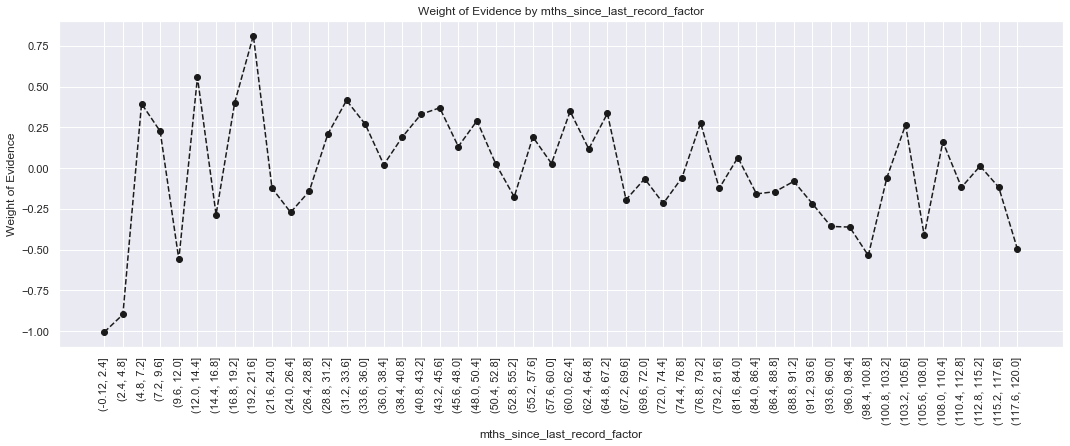

In [152]:
df_temp['mths_since_last_record_factor'] = df_temp['mths_since_last_record_factor'].astype(str)
plot_by_woe(df_temp,90)

In [153]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()),1,0)
df_inputs_prepr['mths_since_last_record:0-15'] = np.where((df_inputs_prepr['mths_since_last_record'] >=0) & (df_inputs_prepr['mths_since_last_delinq']<15),1,0)
df_inputs_prepr['mths_since_last_record:15-38'] = np.where((df_inputs_prepr['mths_since_last_record'] >=15) & (df_inputs_prepr['mths_since_last_delinq']<38),1,0)
df_inputs_prepr['mths_since_last_record:38-72'] = np.where((df_inputs_prepr['mths_since_last_record'] >=38) & (df_inputs_prepr['mths_since_last_delinq']<72),1,0)
df_inputs_prepr['mths_since_last_record:>=72'] = np.where((df_inputs_prepr['mths_since_last_record']>=72),1,0)

In [154]:
df_inputs_prepr.shape

(421094, 294)

In [155]:
loan_data_inputs_train.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:<12,dti:12-18,dti:18-22,dti:22-30,dti:>30,mths_since_last_record:Missing,mths_since_last_record:0-15,mths_since_last_record:15-38,mths_since_last_record:38-72,mths_since_last_record:>=72
282093,282093,29635139,32168364,8000,8000,8000.0,36 months,11.67,264.46,B,...,0,0,1,0,0,0,0,0,1,0
329078,329078,23864199,26237022,9625,9625,9625.0,36 months,18.24,349.13,D,...,0,0,0,1,0,1,0,0,0,0
327665,327665,24045040,26417756,4000,4000,4000.0,36 months,8.39,126.07,A,...,0,1,0,0,0,0,0,0,0,1
329690,329690,23964031,26336871,16000,16000,16000.0,36 months,10.15,517.41,B,...,0,0,0,0,1,0,0,1,1,0
449005,449005,11386575,13328740,16000,16000,16000.0,36 months,14.98,554.49,C,...,0,0,0,0,1,1,0,0,0,0


### Preprocessing the Test Data

In [156]:
# Creating a copy of df_inputs_prepr train
#loan_data_inputs_train = df_inputs_prepr
loan_data_inputs_2015 = df_inputs_prepr
loan_data_targets_2015 = df_targets_prepr

In [157]:
loan_data_inputs_2015.shape

(421094, 294)

In [158]:
loan_data_targets_2015.shape

(421094,)

In [159]:
# Exporting to .csv
#loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
#loan_data_targets_train.to_csv('loan_data_targets_train.csv')
#loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
#loan_data_targets_test.to_csv('loan_data_targets_test.csv')

In [160]:
#Exporting the new datasets to csv
loan_data_inputs_2015.to_csv('loan_data_inputs_2015.csv')
loan_data_targets_2015.to_csv('loan_data_targets_2015.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [161]:
# Loading the ref_cat file & the scorecard for the original data
inputs_train_with_ref_cat = pd.read_csv(r'C:\Users\WIN8\Desktop\PGDS 2020\Models\Lending Club Credit Risk\Processed Datasets for PD\inputs_train_with_ref_cat_final.csv', index_col = 0)
df_scorecard = pd.read_csv(r'C:\Users\WIN8\Desktop\PGDS 2020\Models\Lending Club Credit Risk\Processed Datasets for PD\df_scorecard_final.csv', index_col = 0)

In [162]:
# Making the ref_cat file for the new data
inputs_2015_with_ref_cat = loan_data_inputs_2015.loc[:,['home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:AK_DC_KS_WY_ID_ME',
'addr_state:TN_HI_NV',
'addr_state:AZ_RI_NY',
'addr_state:VA_LA',
'addr_state:MD_AL_IN_MO',
'addr_state:MA_AR',
'addr_state:MI_DE_WI',
'addr_state:NC_NM',
'addr_state:CO_MN_NH_KY_VT',
'addr_state:AK_KS_WY_ID_ME',
'addr_state:SC_WV_UT',
'addr_state:FL',
'addr_state:TX',
'addr_state:NJ',
'addr_state:GA',
'addr_state:OH',
'addr_state:CA',
'addr_state:IL',
'addr_state:OR',
'addr_state:WA',
'addr_state:CT',
'addr_state:SD_OK_MS_MT_NE_IA_ND',
'purpose:house_moving',
'purpose:other_medical',
'purpose:vacation_major_purchase',
'purpose:wedding_renewable_energy',
'purpose:small_business',
'purpose:debt_consolidation',
'purpose:home_improvement',
'purpose:credit_card',
'purpose:car',
'purpose:educational',
'sub_grade:G5_G3_G4',
'sub_grade:G1_G2_F3_F5',
'sub_grade:E2_E4_F4_E5_F1_F2',
'sub_grade:E1',
'sub_grade:E3',
'sub_grade:D5',
'sub_grade:D4',
'sub_grade:D1',
'sub_grade:D2',
'sub_grade:D3',
'sub_grade:C5',
'sub_grade:C4',
'sub_grade:C3',
'sub_grade:C2',
'sub_grade:C1',
'sub_grade:B5',
'sub_grade:B4',
'sub_grade:B2',
'sub_grade:B3',
'sub_grade:B1',
'sub_grade:A5',
'sub_grade:A4',
'sub_grade:A3',
'sub_grade:A2',
'sub_grade:A1',
'emp_length:0',
'emp_length:1',
'emp_length:2',
'emp_length:3',
'emp_length:4',
'emp_length:5',
'emp_length:6',
'emp_length:7',
'emp_length:8',
'emp_length:9',
'emp_length:10',
'months_issue_d_date:<49',
'months_issue_d_date:49-54',
'months_issue_d_date:55-61',
'months_issue_d_date:62-77',
'months_issue_d_date:>77',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<153',
'months_since_earliest_cr_line:154-258',
'months_since_earliest_cr_line:<258-387',
'months_since_earliest_cr_line:<387',
'delinq_2yrs:<5',
'delinq_2yrs:5-10',
'delinq_2yrs:>10',
'inq_last_6mths:<4',
'inq_last_6mths:4-6',
'inq_last_6mths:>6',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-7',
'mths_since_last_delinq:7-18',
'mths_since_last_delinq:18-36',
'mths_since_last_delinq:36-54',
'mths_since_last_delinq:54-82',
'mths_since_last_delinq:>=82',
'dti:<12',
'dti:12-18',
'dti:18-22',
'dti:22-30',
'dti:>30',
'mths_since_last_record:Missing',
'mths_since_last_record:0-15',
'mths_since_last_record:15-38',
'mths_since_last_record:38-72',
'mths_since_last_record:>=72']]

In [163]:
inputs_2015_with_ref_cat.shape

(421094, 108)

In [164]:
inputs_train_with_ref_cat.shape

(373028, 108)

In [165]:
# Adding an Intercept column to the train and 2015 data
inputs_train_with_ref_cat_with_intercept = inputs_train_with_ref_cat
inputs_train_with_ref_cat_with_intercept.insert(0,'Intercept',1)
# Ordering as per the features in the scorecard
inputs_train_with_ref_cat_with_intercept = inputs_train_with_ref_cat_with_intercept[df_scorecard['Feature name'].values]
inputs_train_with_ref_cat_with_intercept.head()

,Intercept,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:AK_DC_KS_WY_ID_ME,addr_state:TN_HI_NV,addr_state:AZ_RI_NY,addr_state:VA_LA,addr_state:MD_AL_IN_MO,addr_state:MA_AR,addr_state:MI_DE_WI,...,sub_grade:G5_G3_G4,emp_length:0,months_issue_d_date:<49,int_rate:<9.548,months_since_earliest_cr_line:<153,delinq_2yrs:<5,inq_last_6mths:<4,mths_since_last_delinq:0-7,dti:<12,mths_since_last_record:0-15
282093,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0
329078,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
327665,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,0,0,0
329690,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0
449005,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [166]:
# Adding an Intercept column to the train and 2015 data
inputs_2015_with_ref_cat_with_intercept = inputs_2015_with_ref_cat
inputs_2015_with_ref_cat_with_intercept.insert(0,'Intercept',1)
# Ordering as per the features in the scorecard
inputs_2015_with_ref_cat_with_intercept = inputs_2015_with_ref_cat_with_intercept[df_scorecard['Feature name'].values]
inputs_2015_with_ref_cat_with_intercept.head()

,Intercept,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:AK_DC_KS_WY_ID_ME,addr_state:TN_HI_NV,addr_state:AZ_RI_NY,addr_state:VA_LA,addr_state:MD_AL_IN_MO,addr_state:MA_AR,addr_state:MI_DE_WI,...,sub_grade:G5_G3_G4,emp_length:0,months_issue_d_date:<49,int_rate:<9.548,months_since_earliest_cr_line:<153,delinq_2yrs:<5,inq_last_6mths:<4,mths_since_last_delinq:0-7,dti:<12,mths_since_last_record:0-15
0,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
1,1,0,1,0,0,0,0,1,0,0,...,0,1,1,1,0,1,1,0,1,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,1,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0


In [171]:
scorecard_scores = df_scorecard['Score - Final']
# Reshaping the scorescard_scores
scorecard_scores = scorecard_scores.values.reshape(109,1)

In [172]:
# Multiplying the scores with the dummy variables of original data
y_scores_train = inputs_train_with_ref_cat_with_intercept.dot(scorecard_scores)
y_scores_train.head()

,0
282093,605.0
329078,568.0
327665,621.0
329690,599.0
449005,591.0


In [173]:
# Multiplying the scores with the dummy variables of new data
y_scores_2015 = inputs_2015_with_ref_cat_with_intercept.dot(scorecard_scores)
y_scores_2015.head()

,0
0,642.0
1,695.0
2,604.0
3,600.0
4,634.0


In [174]:
# Merging the y_scores to the main dataframes
inputs_train_with_ref_cat_with_intercept = pd.concat([inputs_train_with_ref_cat_with_intercept, y_scores_train], axis = 1)
inputs_2015_with_ref_cat_with_intercept = pd.concat([inputs_2015_with_ref_cat_with_intercept, y_scores_2015], axis = 1)

In [175]:
# Renaming the scores column to score
inputs_train_with_ref_cat_with_intercept.columns.values[inputs_train_with_ref_cat_with_intercept.shape[1] - 1] = 'Score'
inputs_2015_with_ref_cat_with_intercept.columns.values[inputs_2015_with_ref_cat_with_intercept.shape[1] - 1] = 'Score'

In [176]:
inputs_2015_with_ref_cat_with_intercept.head()

,Intercept,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:AK_DC_KS_WY_ID_ME,addr_state:TN_HI_NV,addr_state:AZ_RI_NY,addr_state:VA_LA,addr_state:MD_AL_IN_MO,addr_state:MA_AR,addr_state:MI_DE_WI,...,emp_length:0,months_issue_d_date:<49,int_rate:<9.548,months_since_earliest_cr_line:<153,delinq_2yrs:<5,inq_last_6mths:<4,mths_since_last_delinq:0-7,dti:<12,mths_since_last_record:0-15,Score
0,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,642.0
1,1,0,1,0,0,0,0,1,0,0,...,1,1,1,0,1,1,0,1,0,695.0
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,604.0
3,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,600.0
4,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,634.0


We calculate the PSI with the dummy variables. Hence, we need to create dummy variables for the scores too. The range of the scores column is 300-850. Let us create dummy variables for score with intervals of 50.

In [177]:
inputs_train_with_ref_cat_with_intercept['Score:300-350'] = np.where((inputs_train_with_ref_cat_with_intercept['Score'] >= 300) & (inputs_train_with_ref_cat_with_intercept['Score'] < 350),1,0)
inputs_train_with_ref_cat_with_intercept['Score:350-400'] = np.where((inputs_train_with_ref_cat_with_intercept['Score'] >= 350) & (inputs_train_with_ref_cat_with_intercept['Score'] < 400),1,0)
inputs_train_with_ref_cat_with_intercept['Score:400-450'] = np.where((inputs_train_with_ref_cat_with_intercept['Score'] >= 400) & (inputs_train_with_ref_cat_with_intercept['Score'] < 450),1,0)
inputs_train_with_ref_cat_with_intercept['Score:450-500'] = np.where((inputs_train_with_ref_cat_with_intercept['Score'] >= 450) & (inputs_train_with_ref_cat_with_intercept['Score'] < 500),1,0)
inputs_train_with_ref_cat_with_intercept['Score:500-550'] = np.where((inputs_train_with_ref_cat_with_intercept['Score'] >= 500) & (inputs_train_with_ref_cat_with_intercept['Score'] < 550),1,0)
inputs_train_with_ref_cat_with_intercept['Score:550-600'] = np.where((inputs_train_with_ref_cat_with_intercept['Score'] >= 550) & (inputs_train_with_ref_cat_with_intercept['Score'] < 600),1,0)
inputs_train_with_ref_cat_with_intercept['Score:600-650'] = np.where((inputs_train_with_ref_cat_with_intercept['Score'] >= 600) & (inputs_train_with_ref_cat_with_intercept['Score'] < 650),1,0)
inputs_train_with_ref_cat_with_intercept['Score:650-700'] = np.where((inputs_train_with_ref_cat_with_intercept['Score'] >= 650) & (inputs_train_with_ref_cat_with_intercept['Score'] < 700),1,0)
inputs_train_with_ref_cat_with_intercept['Score:700-750'] = np.where((inputs_train_with_ref_cat_with_intercept['Score'] >= 700) & (inputs_train_with_ref_cat_with_intercept['Score'] < 750),1,0)
inputs_train_with_ref_cat_with_intercept['Score:750-800'] = np.where((inputs_train_with_ref_cat_with_intercept['Score'] >= 750) & (inputs_train_with_ref_cat_with_intercept['Score'] < 800),1,0)
inputs_train_with_ref_cat_with_intercept['Score:800-850'] = np.where((inputs_train_with_ref_cat_with_intercept['Score'] >= 800) & (inputs_train_with_ref_cat_with_intercept['Score'] < 850),1,0)

In [178]:
inputs_2015_with_ref_cat_with_intercept['Score:300-350'] = np.where((inputs_2015_with_ref_cat_with_intercept['Score'] >= 300) & (inputs_2015_with_ref_cat_with_intercept['Score'] < 350),1,0)
inputs_2015_with_ref_cat_with_intercept['Score:350-400'] = np.where((inputs_2015_with_ref_cat_with_intercept['Score'] >= 350) & (inputs_2015_with_ref_cat_with_intercept['Score'] < 400),1,0)
inputs_2015_with_ref_cat_with_intercept['Score:400-450'] = np.where((inputs_2015_with_ref_cat_with_intercept['Score'] >= 400) & (inputs_2015_with_ref_cat_with_intercept['Score'] < 450),1,0)
inputs_2015_with_ref_cat_with_intercept['Score:450-500'] = np.where((inputs_2015_with_ref_cat_with_intercept['Score'] >= 450) & (inputs_2015_with_ref_cat_with_intercept['Score'] < 500),1,0)
inputs_2015_with_ref_cat_with_intercept['Score:500-550'] = np.where((inputs_2015_with_ref_cat_with_intercept['Score'] >= 500) & (inputs_2015_with_ref_cat_with_intercept['Score'] < 550),1,0)
inputs_2015_with_ref_cat_with_intercept['Score:550-600'] = np.where((inputs_2015_with_ref_cat_with_intercept['Score'] >= 550) & (inputs_2015_with_ref_cat_with_intercept['Score'] < 600),1,0)
inputs_2015_with_ref_cat_with_intercept['Score:600-650'] = np.where((inputs_2015_with_ref_cat_with_intercept['Score'] >= 600) & (inputs_2015_with_ref_cat_with_intercept['Score'] < 650),1,0)
inputs_2015_with_ref_cat_with_intercept['Score:650-700'] = np.where((inputs_2015_with_ref_cat_with_intercept['Score'] >= 650) & (inputs_2015_with_ref_cat_with_intercept['Score'] < 700),1,0)
inputs_2015_with_ref_cat_with_intercept['Score:700-750'] = np.where((inputs_2015_with_ref_cat_with_intercept['Score'] >= 700) & (inputs_2015_with_ref_cat_with_intercept['Score'] < 750),1,0)
inputs_2015_with_ref_cat_with_intercept['Score:750-800'] = np.where((inputs_2015_with_ref_cat_with_intercept['Score'] >= 750) & (inputs_2015_with_ref_cat_with_intercept['Score'] < 800),1,0)
inputs_2015_with_ref_cat_with_intercept['Score:800-850'] = np.where((inputs_2015_with_ref_cat_with_intercept['Score'] >= 800) & (inputs_2015_with_ref_cat_with_intercept['Score'] < 850),1,0)

## Population Stability Index : Calculation & Interpretation

In [180]:
# Calculating proportions for the dummy variables
PSI_calc_train = inputs_train_with_ref_cat_with_intercept.sum() / inputs_train_with_ref_cat_with_intercept.shape[0]
PSI_calc_train.head()

Intercept                       1.000000
home_ownership:OWN              0.089840
home_ownership:MORTGAGE         0.505828
addr_state:AK_DC_KS_WY_ID_ME    0.017133
addr_state:TN_HI_NV             0.032223
dtype: float64

In [181]:
PSI_calc_2015 = inputs_2015_with_ref_cat_with_intercept.sum() / inputs_2015_with_ref_cat_with_intercept.shape[0]
PSI_calc_2015.head()

Intercept                       1.000000
home_ownership:OWN              0.108684
home_ownership:MORTGAGE         0.493196
addr_state:AK_DC_KS_WY_ID_ME    0.016901
addr_state:TN_HI_NV             0.035408
dtype: float64

In [184]:
# Concatinating the two proportions
PSI_calc = pd.concat([PSI_calc_train, PSI_calc_2015], axis = 1)
# Resetting the index
PSI_calc = PSI_calc.reset_index()

In [185]:
PSI_calc.head()

,index,0,1
0,Intercept,1.000000,1.000000
1,home_ownership:OWN,0.089840,0.108684
2,home_ownership:MORTGAGE,0.505828,0.493196
3,addr_state:AK_DC_KS_WY_ID_ME,0.017133,0.016901
4,addr_state:TN_HI_NV,0.032223,0.035408


In [186]:
# Adding the column of original feature name
PSI_calc['Original Feature Name'] = PSI_calc['index'].str.split(':').str[0]

In [187]:
PSI_calc.head()

,index,0,1,Original Feature Name
0,Intercept,1.000000,1.000000,Intercept
1,home_ownership:OWN,0.089840,0.108684,home_ownership
2,home_ownership:MORTGAGE,0.505828,0.493196,home_ownership
3,addr_state:AK_DC_KS_WY_ID_ME,0.017133,0.016901,addr_state
4,addr_state:TN_HI_NV,0.032223,0.035408,addr_state


In [188]:
# Changing the column names
PSI_calc.columns = ['index', 'Proportions_train', 'Proportions_new', 'Original feature name']

In [189]:
# Changing the order of the columns
PSI_calc = PSI_calc[np.array(['index','Original feature name','Proportions_train', 'Proportions_new' ])]

In [212]:
pd.options.display.max_rows = None
PSI_calc

,index,Original feature name,Proportions_train,Proportions_new,Contribution
0,Intercept,Intercept,1.000000,1.000000,0.000000e+00
1,home_ownership:OWN,home_ownership,0.089840,0.108684,3.587834e-03
2,home_ownership:MORTGAGE,home_ownership,0.505828,0.493196,3.194477e-04
3,addr_state:AK_DC_KS_WY_ID_ME,addr_state,0.017133,0.016901,3.150685e-06
4,addr_state:TN_HI_NV,addr_state,0.032223,0.035408,3.002094e-04
5,addr_state:AZ_RI_NY,addr_state,0.113774,0.107784,3.240511e-04
6,addr_state:VA_LA,addr_state,0.042284,0.040682,6.184033e-05
7,addr_state:MD_AL_IN_MO,addr_state,0.066317,0.069740,1.722761e-04
8,addr_state:MA_AR,addr_state,0.031247,0.030095,4.324122e-05
9,addr_state:MI_DE_WI,addr_state,0.040072,0.043548,2.892212e-04


In [206]:
# Removing the 'Score' and 'Intercept' rows from the Index column
PSI_calc = PSI_calc[(PSI_calc['index'] != 'Intercept') & PSI_calc['index'] != 'Score']

In [213]:
PSI_calc = PSI_calc.drop([0,109], axis = 0)

In [215]:
PSI_calc

,index,Original feature name,Proportions_train,Proportions_new,Contribution
1,home_ownership:OWN,home_ownership,0.089840,0.108684,3.587834e-03
2,home_ownership:MORTGAGE,home_ownership,0.505828,0.493196,3.194477e-04
3,addr_state:AK_DC_KS_WY_ID_ME,addr_state,0.017133,0.016901,3.150685e-06
4,addr_state:TN_HI_NV,addr_state,0.032223,0.035408,3.002094e-04
5,addr_state:AZ_RI_NY,addr_state,0.113774,0.107784,3.240511e-04
6,addr_state:VA_LA,addr_state,0.042284,0.040682,6.184033e-05
7,addr_state:MD_AL_IN_MO,addr_state,0.066317,0.069740,1.722761e-04
8,addr_state:MA_AR,addr_state,0.031247,0.030095,4.324122e-05
9,addr_state:MI_DE_WI,addr_state,0.040072,0.043548,2.892212e-04
10,addr_state:NC_NM,addr_state,0.032786,0.034171,5.728742e-05


In [216]:
# Calculating PSI
#Setting the value of the contribution to 0 if either of the actual or expected proportions are 0 else the PSI calculation
PSI_calc['Contribution'] = np.where((PSI_calc['Proportions_train'] == 0) | (PSI_calc['Proportions_new'] == 0),0,
                                    (PSI_calc['Proportions_new'] - PSI_calc['Proportions_train'])* np.log(PSI_calc['Proportions_new'] / PSI_calc['Proportions_train']))

In [220]:
PSI_calc

,index,Original feature name,Proportions_train,Proportions_new,Contribution
1,home_ownership:OWN,home_ownership,0.089840,0.108684,3.587834e-03
2,home_ownership:MORTGAGE,home_ownership,0.505828,0.493196,3.194477e-04
3,addr_state:AK_DC_KS_WY_ID_ME,addr_state,0.017133,0.016901,3.150685e-06
4,addr_state:TN_HI_NV,addr_state,0.032223,0.035408,3.002094e-04
5,addr_state:AZ_RI_NY,addr_state,0.113774,0.107784,3.240511e-04
6,addr_state:VA_LA,addr_state,0.042284,0.040682,6.184033e-05
7,addr_state:MD_AL_IN_MO,addr_state,0.066317,0.069740,1.722761e-04
8,addr_state:MA_AR,addr_state,0.031247,0.030095,4.324122e-05
9,addr_state:MI_DE_WI,addr_state,0.040072,0.043548,2.892212e-04
10,addr_state:NC_NM,addr_state,0.032786,0.034171,5.728742e-05


In [218]:
# Summing the contribution as per feature names
PSI_calc.groupby('Original feature name')['Contribution'].sum()

Original feature name
Score                            0.160916
addr_state                       0.006802
delinq_2yrs                      0.000838
dti                              0.062410
emp_length                       0.012125
home_ownership                   0.004003
inq_last_6mths                   0.002218
int_rate                         0.079847
months_issue_d_date              0.286052
months_since_earliest_cr_line    0.000506
mths_since_last_delinq           0.012500
mths_since_last_record           0.012380
purpose                          0.026749
sub_grade                        0.013128
Name: Contribution, dtype: float64

We have 13 independent original variables and 1 dependent variable. We observe that the PSI scores for all the features except months_issue_d_date are all below our threshold of 0.25 for assuming 'major differnce', and so may want to rebuild the model. But the months_issue_d_date variable has a PSI score of 0.28. This may be due to the 1 year gap in the two datasets. We must enquire further about the cause for this.

The PSI score for the model outcome or the dependent variable is denoted by the PSI score of 'Score'. It falls within our safety range as discussed above. Hence, we can conclude that our model should work for the new data, if we are satisfied that the 'months_since_d_date' variable's change in proportion is not due to a change in the population after an inquiry into it.